# Housing - 집  값 예측하기, ver 2

* train.csv : 학습 데이터
    - id : 데이터 고유 id
    - OverallQual : 전반적 재료와 마감 품질
    - YearBuilt : 완공 연도
    - YearRemodAdd : 리모델링 연도
    - ExterQual : 외관 재료 품질
    - BsmtQual : 지하실 높이
    - TotalBsmtSF : 지하실 면적 
    - 1stFlrSF : 1층 면적 
    - GrLivArea : 지상층 생활 면적
    - FullBath : 지상층 화장실 개수 
    - KitchenQual : 부억 품질 
    - GarageYrBlt : 차고 완공 연도
    - GarageCars: 차고 자리 개수
    - GarageArea: 차고 면적 
    
    - target : 집값(달러 단위)
    
<br>

* test.csv
    - id : 데이터 고유 id
    - OverallQual : 전반적 재료와 마감 품질
    - YearBuilt : 완공 연도
    - YearRemodAdd : 리모델링 연도
    - ExterQual : 외관 재료 품질
    - BsmtQual : 지하실 높이
    - TotalBsmtSF : 지하실 면적 
    - 1stFlrSF : 1층 면적 
    - GrLivArea : 지상층 생활 면적
    - FullBath : 지상층 화장실 개수 
    - KitchenQual : 부억 품질 
    - GarageYrBlt : 차고 완공 연도
    - GarageCars: 차고 자리 개수
    - GarageArea: 차고 면적 

<br>

* sample_submission.csv 
    - id : 데이터 고유 id
    - target : 집값(달러 단위)

## Preparation

### Load Library

In [37]:
# utility
import os
from copy import deepcopy
import warnings

# data handling
import pandas as pd
import numpy as np
import missingno as msno

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats
import pingouin as pg

# modeling
import sklearn

### Global Setting

In [38]:
# plotting setting
from IPython.core.display import display, HTML
from IPython.display import Image
plt.style.use('seaborn')  # plt.style.use('ggplot')
sns.set(font_scale=1.5)

plt.rc('font', family='AppleGothic') # For Windows
plt.rcParams['figure.figsize'] = [10, 5]
mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

# ignore warnings
warnings.filterwarnings('ignore')

In [39]:
proj_dir=os.getcwd()
data_dir=(proj_dir +  '/data')

## Exploratory Data Analysis

### Load data

In [40]:
os.listdir(data_dir)

['test.csv', 'train.csv', 'sample_submission.csv']

In [41]:
df_train_raw = pd.read_csv(('%s/train.csv' % (data_dir)), encoding='euc-kr')
df_test_raw = pd.read_csv(('%s/test.csv' % (data_dir)), encoding='euc-kr')

### Glimpse data

* 데이터의 크기
    * train set, instance 1350개, features 14개
    * test set, instance 1350개, features 14개

In [42]:
print('train set: ',df_train_raw.shape)
print('test set: ',df_test_raw.shape)

train set:  (1350, 15)
test set:  (1350, 14)


* 데이터의 형태

In [43]:
df_train_raw.head(3)

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000


* 데이터의 유형

    <br>

    * Feature (14)
        * Categorical : Exter Qual, Kitchen Qual, Bsmt Qual, 
        * Numerical : id, Overall Qual, Gr Liv Area, Garage Cars, Garage Area, Total Bsmt SF, 1st Flr SF, Full Bath, Year Built, Year Remod/Add, Garage Yr Blt
        
        <br>
        
    * Target
        * target, Numerical

In [8]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
 14  target          1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


### Check missing value

* Missing Value는 관찰되지 않는다.

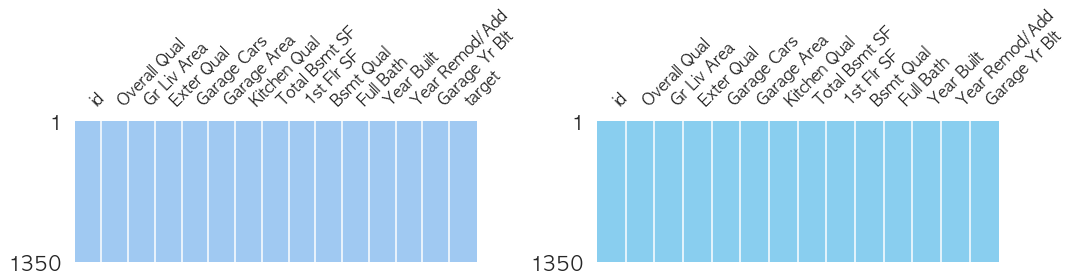

In [44]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
msno.matrix(df=df_train_raw, color=(0.63, 0.79, 0.95), ax=axes[0])
msno.matrix(df=df_test_raw, color=(0.54, 0.81, 0.94), ax=axes[1])
plt.tight_layout()
plt.show()

In [45]:
df_train_raw.isnull().sum()

id                0
Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
target            0
dtype: int64

In [11]:
df_test_raw.isnull().sum()

id                0
Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
dtype: int64

### Descriptic statistics

In [46]:
numerical = df_train_raw.columns[(df_train_raw.dtypes==int) | (df_train_raw.dtypes== float)]
categorical = df_train_raw.columns[df_train_raw.dtypes=='O']

#### Check numerical features

In [47]:
len(numerical)

12

* 정보가가 있는지 여부, 분포의 형태(normal, binomial, skewness, kurtosis), Scale의 특성(ratio & interval) 등을 확인한다.

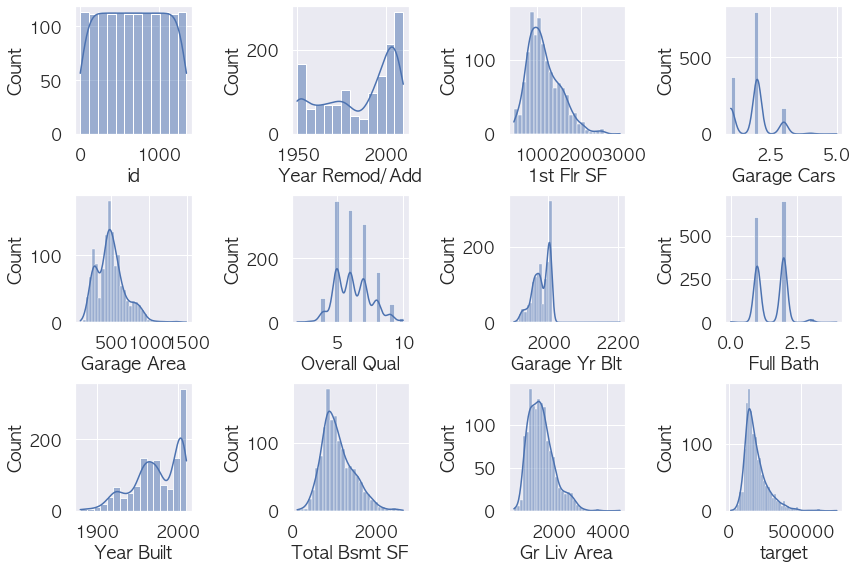

In [48]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
for idx, name in enumerate(numerical):
    sns.histplot(data=df_train_raw[('%s' % name)], kde=True, 
                 ax=axs[np.mod(idx, 3), np.mod(idx, 4)])
plt.tight_layout()
plt.show()

* 각 Feature의 단위, Outlier의 존재 여부를 확인한다.

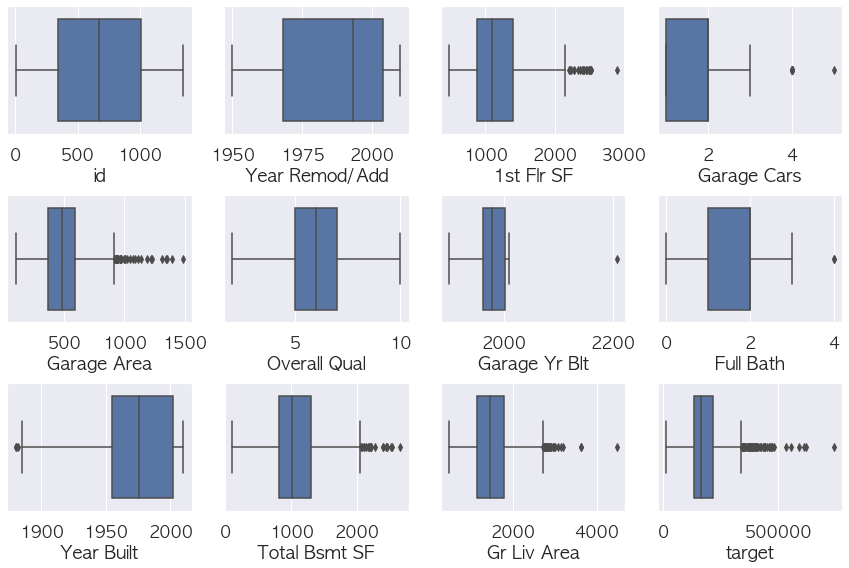

In [49]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
for idx, name in enumerate(numerical):
    sns.boxplot(x=df_train_raw[('%s' % name)],
                 ax=axs[np.mod(idx, 3), np.mod(idx, 4)])
plt.tight_layout()
plt.show()

* 각 numerical feature들의 통계치를 확인한다.

In [50]:
summary = pd.DataFrame()
for idx, name in enumerate(numerical):
    tmp_df = pd.DataFrame({'Count_val':[df_train_raw[('%s' % name)].count()],
              'Count_Nan':[df_train_raw[('%s' % name)].isnull().sum()],
              'Mean':[df_train_raw[('%s' % name)].mean()],
              'Median':[df_train_raw[('%s' % name)].median()],
              #'Mode':[df_train_raw[('%s' % name)].mode()],
              'Std':[df_train_raw[('%s' % name)].std()],
              'Var':[df_train_raw[('%s' % name)].var()],
              'Min':[df_train_raw[('%s' % name)].min()],
              '25% Q':[df_train_raw[('%s' % name)].quantile(q=0.25, interpolation='linear')],
              '50% Q':[df_train_raw[('%s' % name)].quantile(q=0.5, interpolation='linear')],
              '75% Q':[df_train_raw[('%s' % name)].quantile(q=0.75, interpolation='linear')],
              'Max':[df_train_raw[('%s' % name)].max()],
              'Skewness':[df_train_raw[('%s' % name)].skew()],
              'Kurtosis':[df_train_raw[('%s' % name)].kurt()]}).T
    tmp_df.columns = [('%s' % name)]
    summary = pd.concat([summary, tmp_df], axis = 1)
summary.round(2)

,id,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
Count_val,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1350.00,1.350000e+03
Count_Nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00
Mean,675.50,6.21,1513.54,1.87,502.01,1082.64,1167.47,1.56,1972.99,1985.10,1978.47,1.864063e+05
Median,675.50,6.00,1445.50,2.00,484.00,1009.00,1092.50,2.00,1976.00,1993.00,1978.50,1.653750e+05
Std,389.86,1.34,487.52,0.65,191.39,384.07,375.06,0.55,29.31,20.15,25.38,7.843542e+04
Var,151987.50,1.79,237678.91,0.43,36630.12,147508.01,140671.06,0.30,858.92,406.15,644.01,6.152116e+09
Min,1.00,2.00,480.00,1.00,100.00,105.00,480.00,0.00,1880.00,1950.00,1900.00,1.278900e+04
25% Q,338.25,5.00,1144.00,1.00,368.00,816.00,886.25,1.00,1955.00,1968.00,1961.00,1.350000e+05
50% Q,675.50,6.00,1445.50,2.00,484.00,1009.00,1092.50,2.00,1976.00,1993.00,1978.50,1.653750e+05
75% Q,1012.75,7.00,1774.50,2.00,588.00,1309.50,1396.50,2.00,2002.00,2004.00,2002.00,2.178750e+05


* ID feature를 제거한다.

In [51]:
numerical_targ = np.delete(numerical.values, np.where(numerical=='id'))

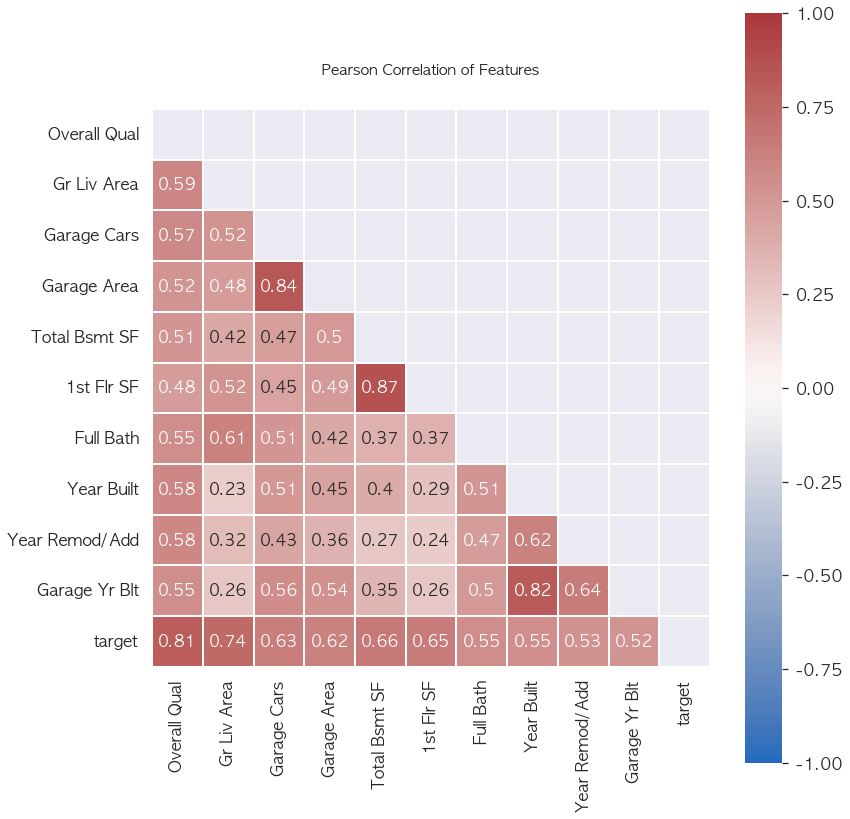

In [52]:
corr_matrix = df_train_raw[numerical_targ].corr(method="pearson")
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12, 12))
plt.title("Pearson Correlation of Features", y=1.05, size=15)
g1= sns.heatmap(corr_matrix,
                linewidths=0.1, vmax=1.0, vmin=-1.0, mask=mask,
                square=True, cmap= "vlag", linecolor='white', 
                annot=True, annot_kws={"size": 16},
               ax = ax)
plt.tight_layout()
plt.show()

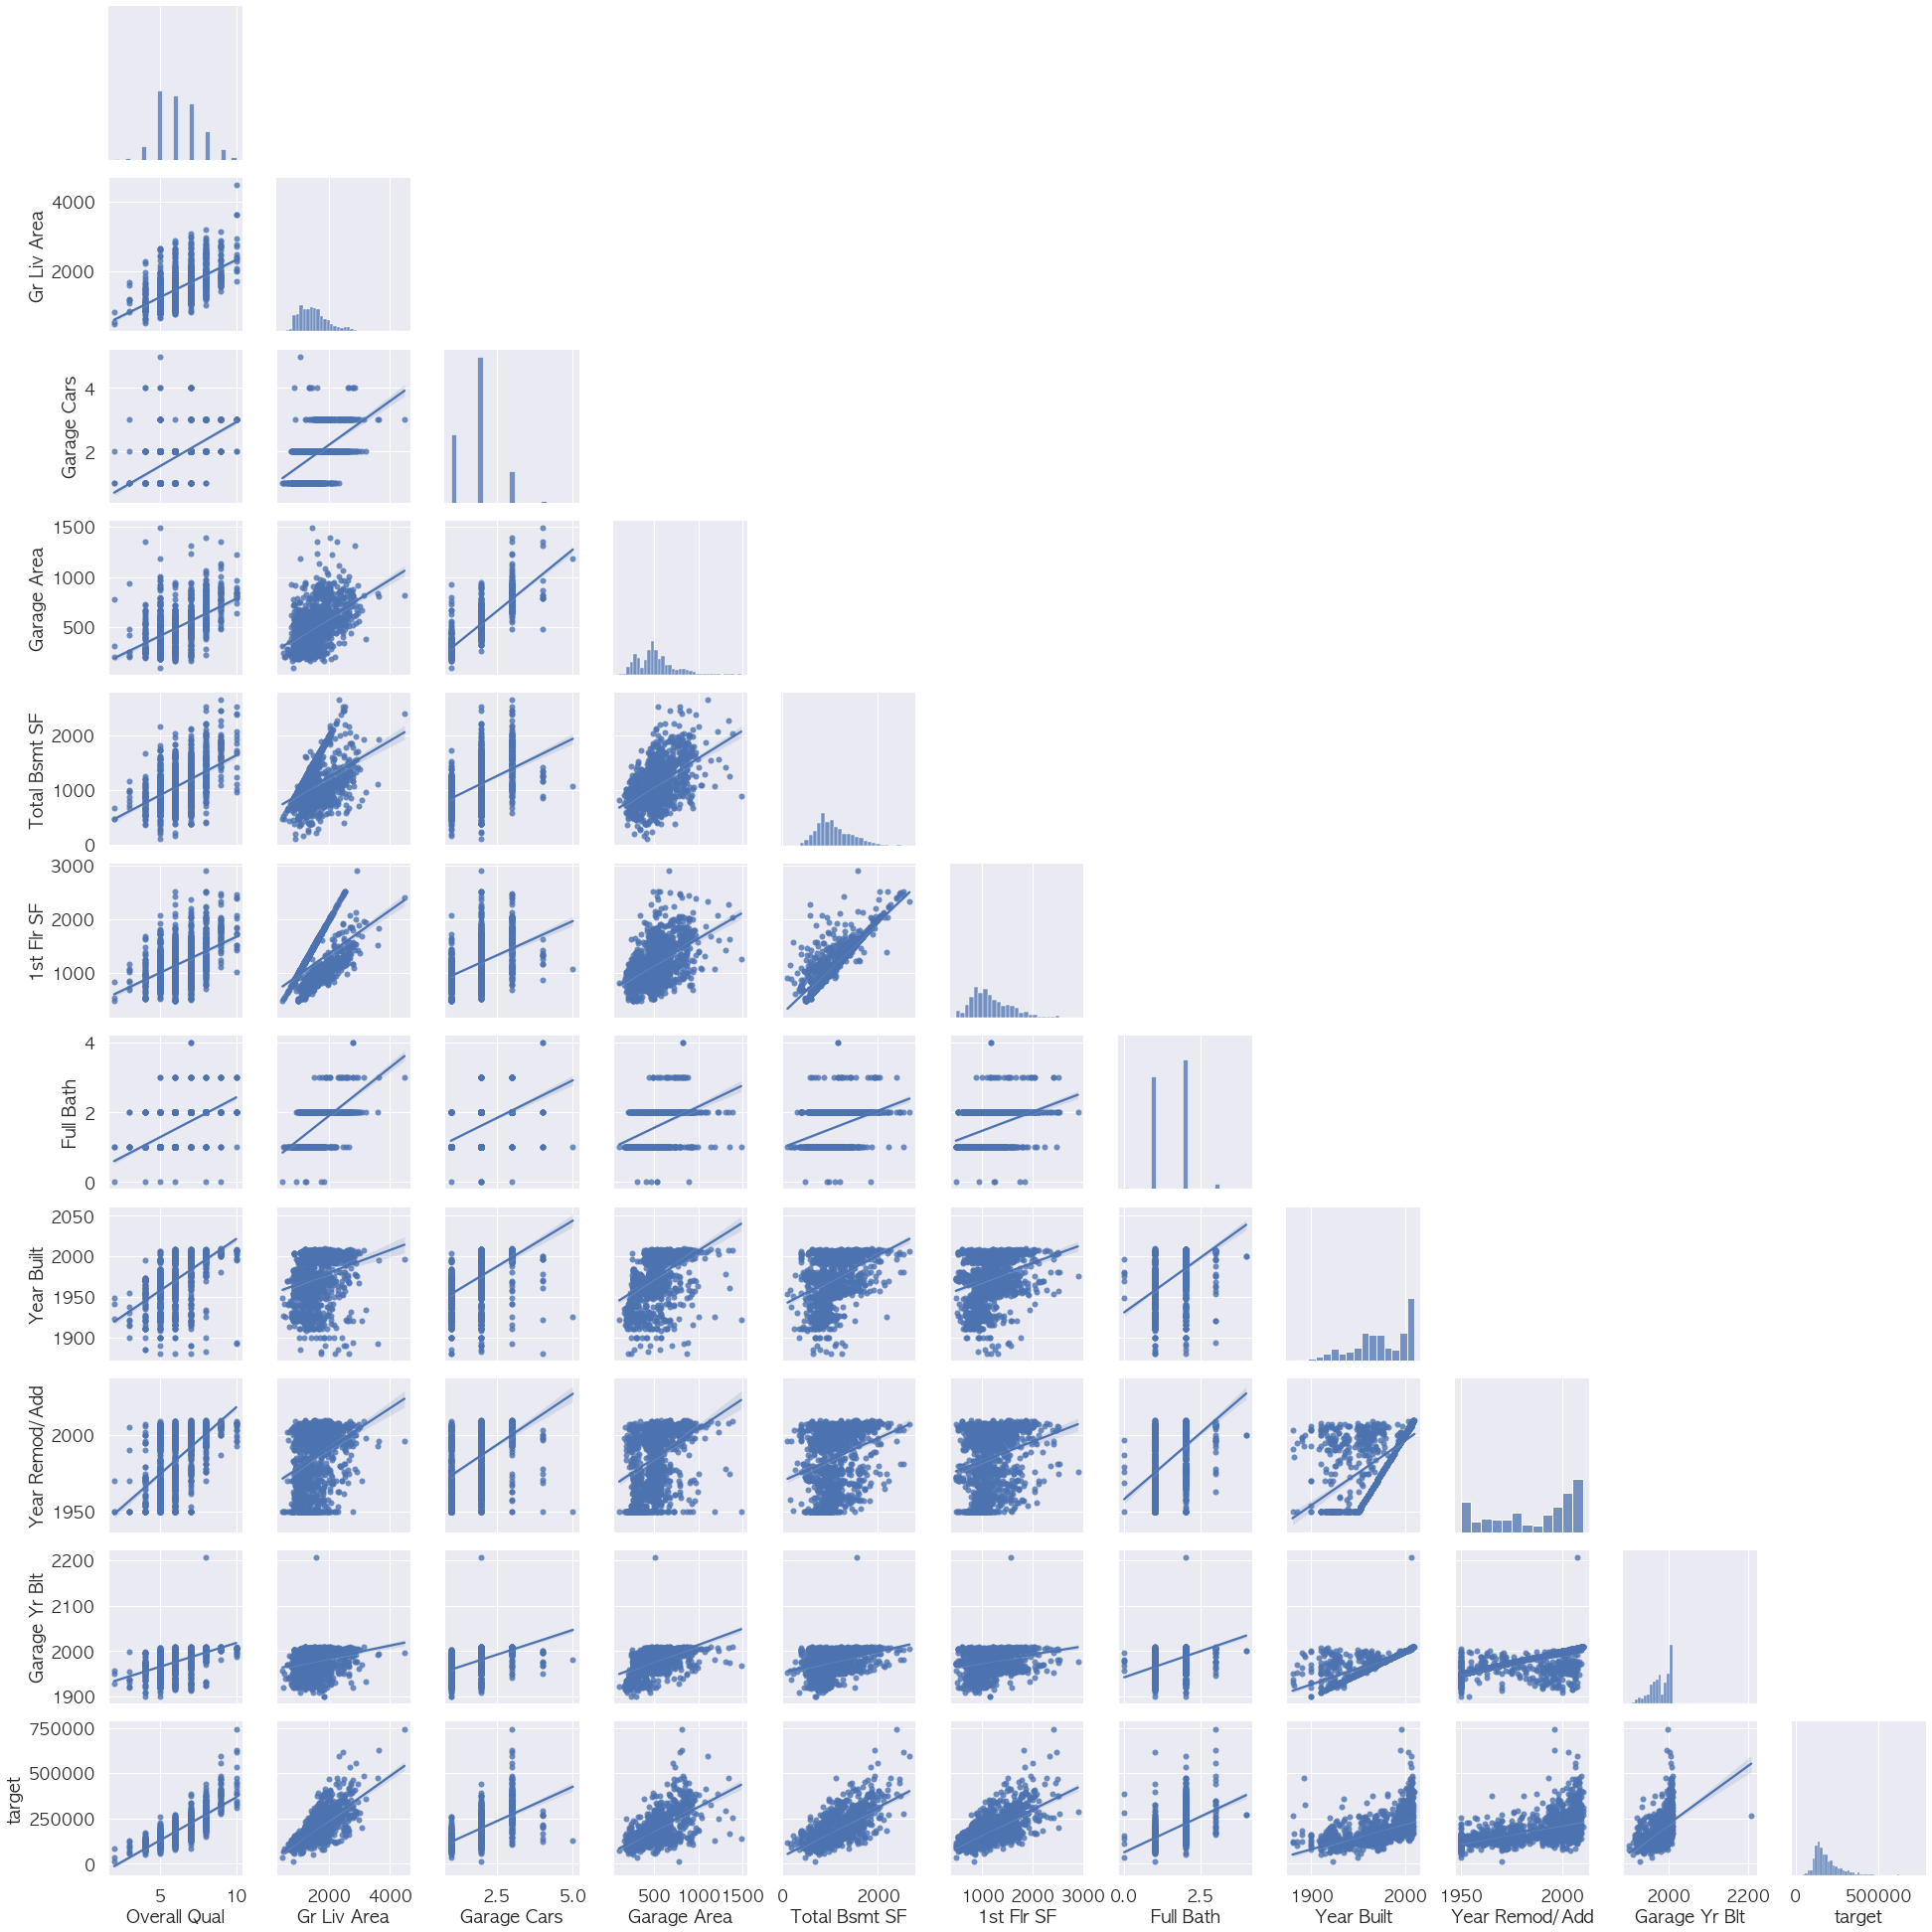

In [20]:
g1 = sns.pairplot(data=df_train_raw[numerical_targ], 
             kind = 'reg', corner=True)
plt.show()

* 상호 간 역상관을 보이는 Feature는 없다. 전반적으로 상호 간 상관이 높은 특성을 보인다. 
* Target과의 상관은 Overall Qual(전반적 재료와 마감 품질), Gr Liv Area(지상층 생활 면적), Total Bsmt SF(지하실 면적), 1st Flr SF(1층 면적), Garage Area(차고 면적)순으로 높다.
* Garage Area(차고 면적)와 Garage Cars(차고 자리 개수), 1st Flr Sf(1층 생활 면적)과 Total Bsmt Sf(지하실 면적), Garage Yr Blt(차고 완공 연도)와 Year Built(완공 연도)는 상호간 상관이 높다. 

#### Check categorical features

In [54]:
categorical_targ =  np.append(categorical.values, 'target')
categorical_targ

array(['Exter Qual', 'Kitchen Qual', 'Bsmt Qual', 'target'], dtype=object)

* 범주별 빈도를 확인한다.

In [57]:
new_idx = ['Ex','Gd','TA','Fa','Po']

In [58]:
for idx, name in enumerate(categorical):
    globals()['cdf_{}'.format(idx)] = pd.DataFrame((df_train_raw
              .filter([('%s' % name)])
              .value_counts(normalize=True)*100))
freq = pd.concat([cdf_0, cdf_1, cdf_2], axis = 1).reset_index() 
freq.columns = ['index', categorical[0], categorical[1], categorical[2]]
freq.set_index('index', inplace=True)
freq = freq.reindex(new_idx)
freq


,Exter Qual,Kitchen Qual,Bsmt Qual
index,,,
Ex,3.629630,7.925926,9.925926
Gd,35.925926,41.481481,43.111111
TA,59.851852,48.888889,44.814815
Fa,0.592593,1.703704,2.074074
Po,NaN,NaN,0.074074


* 범주별 target 요약치를 확인한다.

In [59]:
for idx, name in enumerate(categorical):
    globals()['sumdf_{}'.format(idx)] = (df_train_raw[[('%s' % name), 'target']]
         .groupby([('%s' % name)], as_index=True)
         .agg('mean'))
    
sumdf = pd.concat([sumdf_0, sumdf_1, sumdf_2], axis = 1)    
sumdf.columns = [categorical[0], categorical[1], categorical[2]]
sumdf = sumdf.reindex(new_idx)
sumdf

,Exter Qual,Kitchen Qual,Bsmt Qual
Ex,369636.122449,330451.149533,330505.186567
Gd,234161.577320,211360.892857,201927.286942
TA,147533.717822,144246.675758,143175.100826
Fa,95092.875000,118493.173913,112046.785714
Po,NaN,NaN,80900.000000


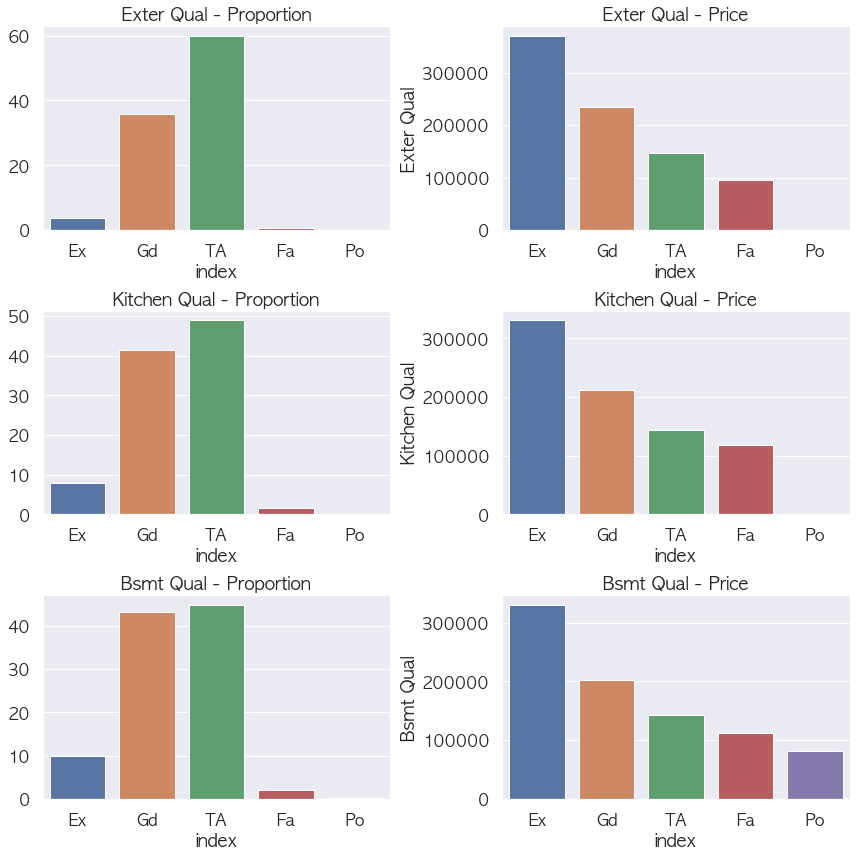

In [60]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

for idx, name in enumerate(categorical):    
    sns.barplot(x = 'index', 
                y = ('%s' % name), 
                data = freq.reset_index(),
                ax=axes[idx,0])
    axes[idx,0].set_title(('%s - Proportion' % name))
    axes[idx,0].set_ylabel('')
    sns.barplot(x='index', y=('%s' % name),
                data=sumdf.reset_index(),
                ax=axes[idx,1])
    axes[idx,1].set_title(('%s - Price' % name))
plt.tight_layout()
plt.show()

* Exter Qual, Kitchen Qual, Bsmt Qual 간 상호 연관성 확인을 위해 Cramer's v를 계산한다. 

In [61]:
# https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix/notebook
def cramers_V(var1,var2):
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    chi2  = stats.chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    n = np.sum(crosstab) # Number of observations
    phi2 = chi2 / n 
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))    

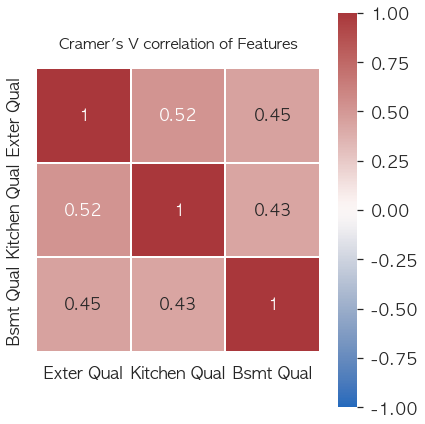

In [62]:
targ_data = df_train_raw[categorical]

rows= []
for var1 in targ_data:
    col = []
    for var2 in targ_data:
        cramers =cramers_V(targ_data[var1], targ_data[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
cramers_results = np.array(rows)
results_matrix = pd.DataFrame(cramers_results, columns = targ_data.columns, index = targ_data.columns)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

plt.title("Cramer's V correlation of Features", y=1.05, size=15)
g1= sns.heatmap(results_matrix, linewidths=0.1, vmax=1.0, vmin=-1.0,
           square=True, cmap= "vlag", linecolor='white', annot=True, annot_kws={"size": 16},
               ax = ax)
plt.tight_layout()
plt.show()

* Cramér's V는 두 범주,이산형 변수 간의 연관성의 크기 정도를 나타낸다. 
* V coefficienct는 항상 양수이며, 두 변수가 최대의 연관성을 가질때는 1, 아무런 연관성이 없을 때는 0 으로 계산된다.
* v ≤ 0.2 는 범주 간 연관성이 약한 경우, 0.2 < v ≤ 0.6는 범주 간 중간 수준의 연관성을 보이는 경우, v > 0.6는 범주 간 연관성이 강한 경우를 나타낸다.

### Converting Categorical Type to Numerical Type

In [63]:
np.unique(df_train_raw[categorical])

array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object)

* 위 변수들은 categorical의 특성을 지닌다. 하지만 원본 데이터의 특성에 따르면 퀄리티 수준을 나타낸다고 한다. 수준은 다음과 같다,
    * Ex : Excellent
    * Gd : Good
    * TA : Typical
    * Fa : Fair
    * Po : Poor
    
    <br>
    
* 이에 따라 Ex = 4, Gd = 3, TA = 2, Fa = 1, Po = 0의 값을 부여한다.

In [64]:
df_train_raw.replace(['Ex'], 4, inplace=True)
df_train_raw.replace(['Gd'], 3, inplace=True)
df_train_raw.replace(['TA'], 2, inplace=True)
df_train_raw.replace(['Fa'], 1, inplace=True)
df_train_raw.replace(['Po'], 0, inplace=True)

# df_test_raw.replace(['Ex'], 4, inplace=True)
# df_test_raw.replace(['Gd'], 3, inplace=True)
# df_test_raw.replace(['Ta'], 2, inplace=True)
# df_test_raw.replace(['Fa'], 1, inplace=True)
# df_test_raw.replace(['Po'], 0, inplace=True)


In [93]:
targ_nF = ['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'target']

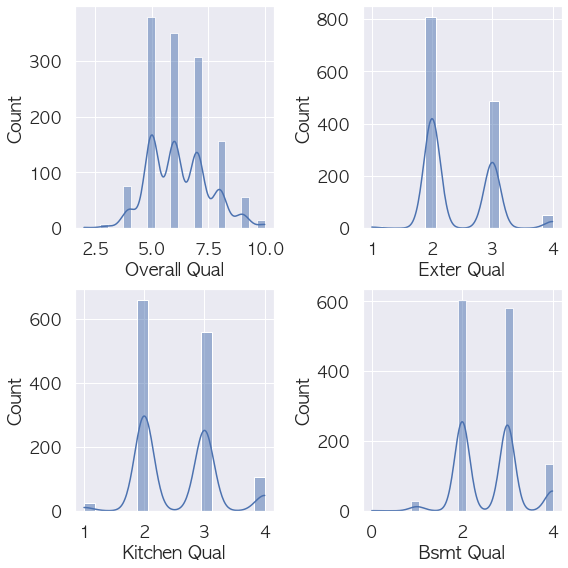

In [72]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
sns.histplot(data=df_train_raw[Qu[0]], kde=True, 
             ax=axs[0, 0])
sns.histplot(data=df_train_raw[Qu[1]], kde=True, 
             ax=axs[0, 1])
sns.histplot(data=df_train_raw[Qu[2]], kde=True, 
             ax=axs[1, 0])
sns.histplot(data=df_train_raw[Qu[3]], kde=True, 
             ax=axs[1, 1])
plt.tight_layout()
plt.show()

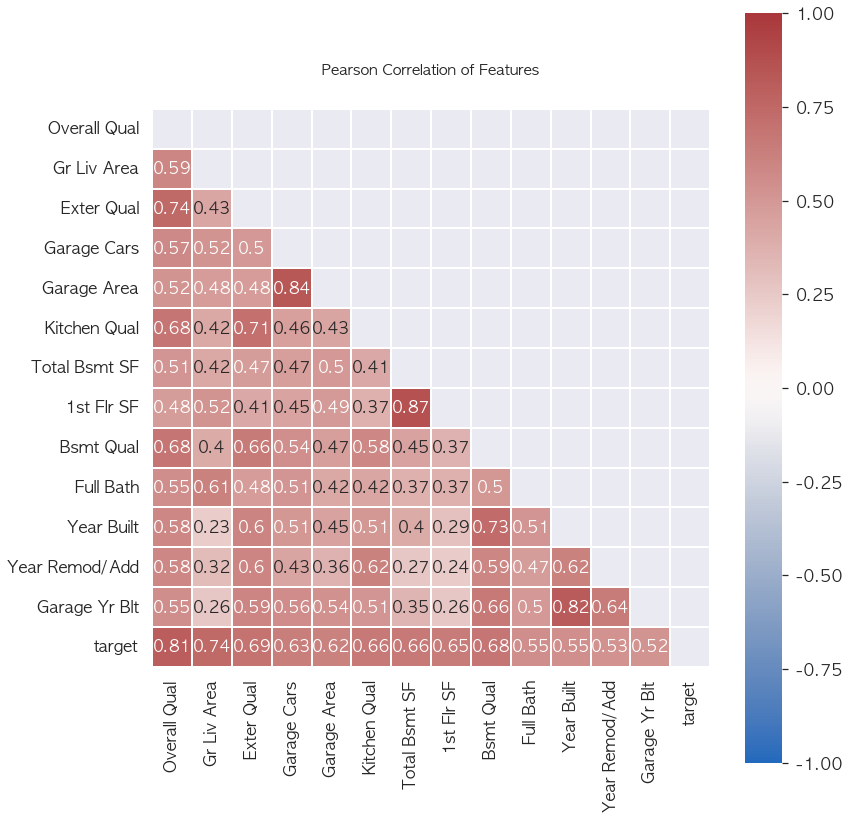

In [94]:
corr_matrix = df_train_raw[targ_nF].corr(method="pearson")
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12, 12))
plt.title("Pearson Correlation of Features", y=1.05, size=15)
g1= sns.heatmap(corr_matrix,
                linewidths=0.1, vmax=1.0, vmin=-1.0, mask=mask,
                square=True, cmap= "vlag", linecolor='white', 
                annot=True, annot_kws={"size": 16},
               ax = ax)
plt.tight_layout()
plt.show()

In [95]:
pd.DataFrame(corr_matrix.target).T

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
target,0.810607,0.742061,0.689324,0.634497,0.617151,0.66075,0.664047,0.646843,0.679005,0.554453,0.546037,0.529477,0.517973,1.0


## Preprocessing - Outliers

* 결측치와 이상치를 처리한다. 여기서 결측치는 관찰되지 않았으므로, 이상치를 일정 기준에 따라 처리한다.

In [97]:
df_train = df_train_raw.copy()

In [98]:
def outlier_value(df):
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = pd.DataFrame(Q1-(IQR*1.5), columns=['q_lower'])
    Q_upper = pd.DataFrame(Q3+(IQR*1.5), columns=['q_upper'])

    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = pd.DataFrame(Mean-std*3, columns=['n_lower'])
    N_upper = pd.DataFrame(Mean+std*3, columns=['n_upper'])
    
    results = pd.concat([Q_lower,Q_upper,N_lower,N_upper], axis = 1)
    return results


def outlier_counts(df):
    tmp_df = deepcopy(df)
    
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = Q1-(IQR*1.5)
    Q_upper = Q3+(IQR*1.5)
    
    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = Mean-std*3
    N_upper = Mean+std*3
    
    Q_out = ((tmp_df<Q_lower) | (tmp_df>Q_upper)).sum()
    N_out = ((tmp_df<N_lower) | (tmp_df>N_upper)).sum()
    
    results = pd.concat([Q_out, N_out],axis=1)
    results.columns = ['IQR*1.5', '+-3SD']
    return results

def outlier_mask(df):
    tmp_df = deepcopy(df)
    
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = Q1-(IQR*1.5)
    Q_upper = Q3+(IQR*1.5)
    
    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = Mean-std*3
    N_upper = Mean+std*3
    
    Q_out = ((tmp_df<Q_lower) | (tmp_df>Q_upper))
    N_out = ((tmp_df<N_lower) | (tmp_df>N_upper))
    
    return Q_out, N_out

In [100]:
nF = ['Overall Qual', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual',
      'Gr Liv Area', '1st Flr SF',  'Total Bsmt SF',  'Full Bath', 
      'Garage Cars', 'Garage Area','Year Built',
     'Year Remod/Add', 'Garage Yr Blt']

tF = ['target']

* Quantile 방법과 3SD 방법 각각에서 Outlier 판별 결과를 확인한다

In [101]:
tmp_df1 = outlier_value(df_train_raw[nF])
tmp_df2 = outlier_counts(df_train_raw[nF])
pd.concat([tmp_df1,tmp_df2], axis= 1)

,q_lower,q_upper,n_lower,n_upper,IQR*1.5,+-3SD
Overall Qual,2.000,10.000,2.194844,10.222934,0,3
Exter Qual,0.500,4.500,0.704644,4.147208,0,0
Kitchen Qual,0.500,4.500,0.566889,4.545704,0,0
Bsmt Qual,0.500,4.500,0.521887,4.692928,1,1
Gr Liv Area,198.250,2720.250,50.972507,2976.111938,29,8
1st Flr SF,120.875,2161.875,42.289853,2292.658295,18,13
Total Bsmt SF,75.750,2049.750,-69.558695,2234.847584,19,9
Full Bath,-0.500,3.500,-0.094198,3.215680,2,2
Garage Cars,-0.500,3.500,-0.087078,3.827819,12,12
Garage Area,38.000,918.000,-72.155054,1076.184684,36,11


In [102]:
tmp_df2.sum()

IQR*1.5    122
+-3SD       68
dtype: int64

In [103]:
tmp_df1, tmp_df2 = outlier_mask(df_train_raw[nF])
drop_m1 = np.where(df_train_raw[nF][~tmp_df1].isnull())[0]
drop_m2 = np.where(df_train_raw[nF][~tmp_df2].isnull())[0]
print('IQR*1.5: ', len(np.unique(drop_m1)))
print('+3SD: ', len(np.unique(drop_m2)))

IQR*1.5:  91
+3SD:  50


* Outlier를 처리할 방법을 찾는다. 데이터가 많을 때, 가장 간단한 방법은 Outlier를 제거하는 것이다. 하지만 현재 Instance의 개수는 1350 밖에 안 되며, Test set에서도 Outlier가 관찰될 가능성이 있으므로, 되도록이면 값을 제거하기보다는 대체하는 방법을 사용한다. 
* 먼저 관찰된 Outlier가 현실적으로 가능한 값인지를 확인해본다.

In [104]:
tmp_df1, tmp_df2 = outlier_mask(df_train_raw[nF])

In [105]:
for idx, name in enumerate(nF):
    print(('%s :' % name), np.sort(pd.unique(df_train_raw[nF][tmp_df1].loc[:,('%s' % name)]))[::-1])

Overall Qual : [nan]
Exter Qual : [nan]
Kitchen Qual : [nan]
Bsmt Qual : [nan  0.]
Gr Liv Area : [  nan 4476. 3627. 3608. 3194. 3140. 3082. 3005. 2978. 2956. 2945. 2898.
 2872. 2868. 2855. 2840. 2814. 2799. 2794. 2792. 2787. 2775. 2772. 2748.
 2730. 2728. 2727. 2726.]
1st Flr SF : [  nan 2898. 2524. 2522. 2515. 2497. 2490. 2470. 2452. 2422. 2411. 2392.
 2362. 2338. 2279. 2276. 2234. 2217. 2207.]
Total Bsmt SF : [  nan 2660. 2535. 2524. 2461. 2458. 2452. 2396. 2392. 2271. 2220. 2217.
 2208. 2190. 2171. 2136. 2110. 2108. 2078. 2062.]
Full Bath : [nan  4.]
Garage Cars : [nan  5.  4.]
Garage Area : [  nan 1488. 1390. 1356. 1348. 1314. 1231. 1220. 1184. 1138. 1110. 1085.
 1069. 1043. 1025. 1008. 1003.  995.  972.  968.  963.  962.  947.  944.
  938.  936.  928.  927.  925.  924.  923.]
Year Built : [  nan 1882. 1880.]
Year Remod/Add : [nan]
Garage Yr Blt : [  nan 2207.]


In [106]:
for idx, name in enumerate(nF):
    print(('%s :' % name), np.sort(pd.unique(df_train_raw[nF][tmp_df2].loc[:,('%s' % name)]))[::-1])

Overall Qual : [nan  2.]
Exter Qual : [nan]
Kitchen Qual : [nan]
Bsmt Qual : [nan  0.]
Gr Liv Area : [  nan 4476. 3627. 3608. 3194. 3140. 3082. 3005. 2978.]
1st Flr SF : [  nan 2898. 2524. 2522. 2515. 2497. 2490. 2470. 2452. 2422. 2411. 2392.
 2362. 2338.]
Total Bsmt SF : [  nan 2660. 2535. 2524. 2461. 2458. 2452. 2396. 2392. 2271.]
Full Bath : [nan  4.]
Garage Cars : [nan  5.  4.]
Garage Area : [  nan 1488. 1390. 1356. 1348. 1314. 1231. 1220. 1184. 1138. 1110. 1085.]
Year Built : [  nan 1885. 1882. 1880.]
Year Remod/Add : [nan]
Garage Yr Blt : [  nan 2207. 1900.]


* 두 방법 모두에서 Garage Yr Blt에 현실적으로 불가능한 값이 관찰된다 (2207) 해당 값은 최대치, 최빈치나 중앙치로 대체한다.
* 처리 과정에서 연도 값의 최대값을 2020으로 간주하고, 2020을 초과하는 값을 대체하도록 하자.
* 다른 변수들의 값은 현실적으로 불가능한 값이 아니다. 이 값들은 모델에 포함하도록 한다.

In [107]:
def replace_outlier(df, columns, threshold):
    for i, j in enumerate(columns):
        tmp_df = df.copy()
        tmp_df[j][tmp_df[j] > threshold] = np.median(tmp_df[j])
        
    return tmp_df    

In [108]:
nF_year =['Year Built', 'Year Remod/Add', 'Garage Yr Blt'] 

In [109]:
df_train = replace_outlier(df_train_raw, nF_year, 2020)

* 결과를 확인하자

In [110]:
tmp_df1 = outlier_value(df_train[nF])
tmp_df2 = outlier_counts(df_train[nF])
pd.concat([tmp_df1,tmp_df2], axis= 1)

,q_lower,q_upper,n_lower,n_upper,IQR*1.5,+-3SD
Overall Qual,2.000,10.000,2.194844,10.222934,0,3
Exter Qual,0.500,4.500,0.704644,4.147208,0,0
Kitchen Qual,0.500,4.500,0.566889,4.545704,0,0
Bsmt Qual,0.500,4.500,0.521887,4.692928,1,1
Gr Liv Area,198.250,2720.250,50.972507,2976.111938,29,8
1st Flr SF,120.875,2161.875,42.289853,2292.658295,18,13
Total Bsmt SF,75.750,2049.750,-69.558695,2234.847584,19,9
Full Bath,-0.500,3.500,-0.094198,3.215680,2,2
Garage Cars,-0.500,3.500,-0.087078,3.827819,12,12
Garage Area,38.000,918.000,-72.155054,1076.184684,36,11


## Statistics

In [262]:
stat_train = deepcopy(df_train)

In [263]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
stat_train[nF] = scaler.fit_transform(stat_train[nF])

In [292]:
import pingouin as pg
from scipy import stats

In [270]:
stat_train = pd.concat([stat_train, df_label], axis=1)

In [280]:
lm = pg.linear_regression(X  = stat_train[nF], y = stat_train.target, relimp=True)

In [287]:
lm[['names', 'relimp', 'relimp_perc']]

,names,relimp,relimp_perc
0,Intercept,NaN,NaN
1,Overall Qual,0.129797,15.091044
2,Exter Qual,0.066223,7.699478
3,Kitchen Qual,0.064415,7.489289
4,Bsmt Qual,0.069390,8.067768
5,Gr Liv Area,0.146284,17.007983
6,1st Flr SF,0.072124,8.385636
7,Total Bsmt SF,0.077791,9.044539
8,Full Bath,0.037996,4.417711
9,Garage Cars,0.050797,5.906031


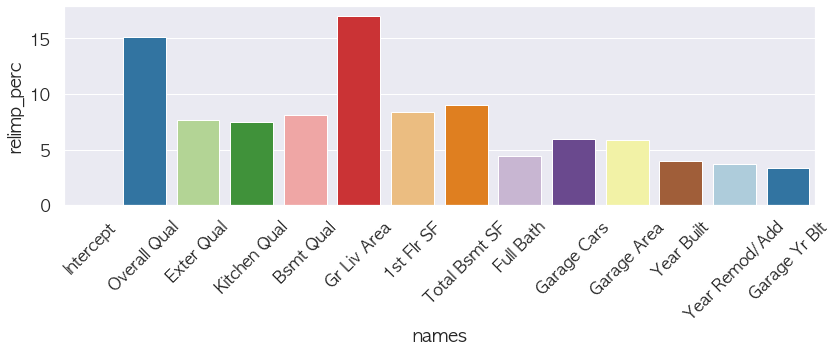

In [288]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
g1 = sns.barplot(data=lm[['names', 'relimp', 'relimp_perc']], x='names', y='relimp_perc', ax=ax, palette="Paired")
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
plt.tight_layout()
plt.show()

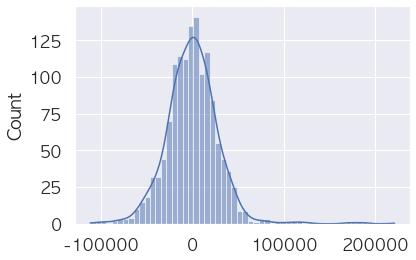

In [301]:
sns.histplot(x=lm.residuals_, kde=True)
plt.show()

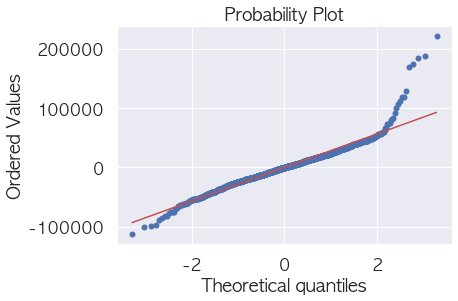

In [299]:
stats.probplot(lm.residuals_, dist='norm', plot=plt)
plt.show()

In [304]:
pg.normality(lm.residuals_)

,W,pval,normal
0,0.932792,3.525054e-24,False


## ML - Model Selection

* 이제 본격적으로 feature engineering, Model Prapration, Train & Validation, Testing의 과정을 거치며 최종 Test에 적합한 모델을 찾는다.
* Test Set의 정답을 알 수 없으므로, 현재 Train Set을 임시로 분할하여 모델링을 수행하고, 적합한 모델을 선택할 것이다. 

In [111]:
df_feature = df_train[nF].copy()
df_label = df_train[tF].copy()

In [112]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(df_feature, df_label, test_size=0.20, random_state=42)

In [113]:
x_tr.shape, x_val.shape, y_tr.shape, y_val.shape

((1080, 13), (270, 13), (1080, 1), (270, 1))

### Feature Engineering

* 앞선 분석에서 Numerical, Categorical 변수를 식별했다.
* Numerical 변수들은 서로 단위가 상이하다. 비현실적인 Outlier를 제거했으니 변수를 Scaling하여 단위를 통일해주자. Outlier가 일부 존재하므로 RobustScaler 기법을 활용한다.
* Categorical 변수들은 범주 4~5개로 구성된다. 이 변수들은 one-hot encoding으로 변환해준다. 

#### Scaling

In [114]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_tr[nF] = scaler.fit_transform(x_tr[nF])
x_val[nF] = scaler.transform(x_val[nF])

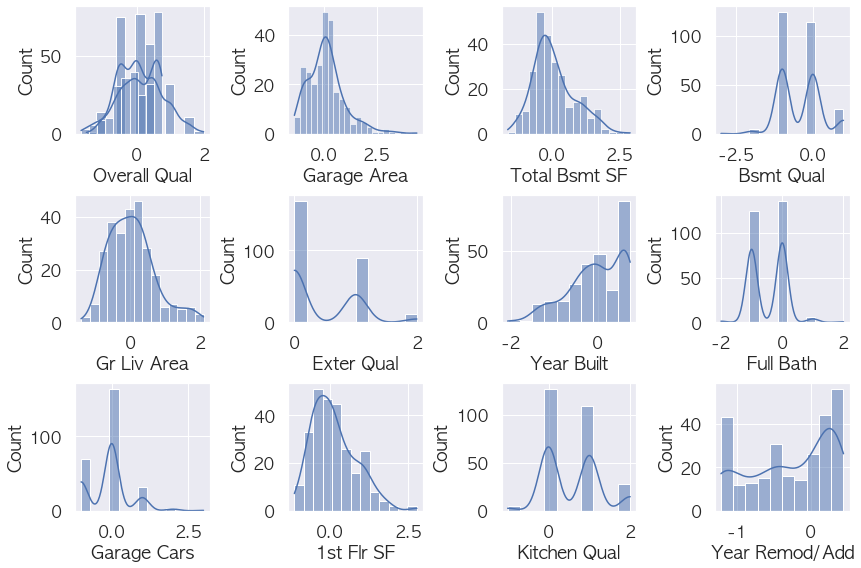

In [115]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
for idx, name in enumerate(nF):
    sns.histplot(data=x_val[('%s' % name)], kde=True, 
                 ax=axs[np.mod(idx, 3), np.mod(idx, 4)])
plt.tight_layout()
plt.show()

#### Feature Selection

* Feature Selection을 위해 Filter, Wrapper, Embedded 각각에서 대표적인 방법 하나씩을 선택한다.
* Filter 에서는 f_regression, Wrapper에서는 RFE, Embedded에서는 Lasso regression 을 수행한다.
* 간단한 linear model을 통해 Feature Selection 결과를 검토한다.

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [52]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

In [121]:
def NMAE(y_true, y_pred):
    mae = np.mean(np.abs(y_true-y_pred))
    loss = mae / np.mean(np.abs(y_true))
    return loss

##### None

In [122]:
x_tr_fs = x_tr.copy()
x_val_fs = x_val.copy()
y_tr_fs = y_tr.copy()
y_val_fs = y_val.copy()

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_tr_fs, y_tr_fs)

y_pred_fs = model.predict(x_val_fs)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('\nMSE : ', mean_squared_error(y_val_fs, y_pred_fs),
      '\nMAE : ', mean_absolute_error(y_val_fs, y_pred_fs),
      '\nNMAE : ', NMAE(y_val_fs, y_pred_fs))


MSE :  679441176.466059 
MAE :  19472.278636747556 
NMAE :  target    0.106001
dtype: float64


In [123]:
fs_df = pd.DataFrame(['None', 'None', 
                      mean_squared_error(y_val_fs, y_pred_fs),
                      NMAE(y_val_fs, y_pred_fs)[0]]).T
fs_df.columns = ['Method', 'Type', 'MSE', 'NMAE']

##### Filter - f_regression

In [124]:
from sklearn.feature_selection import f_regression, SelectKBest
selector=SelectKBest(f_regression, k='all')
selector.fit(x_tr, y_tr)
threshold = 0.001

In [125]:
is_support = selector.pvalues_ < threshold
Results = pd.DataFrame({"Name":x_tr.columns,
              "F":selector.scores_,
              "p-value":selector.pvalues_,
              "Threshold": threshold,
              "Results": is_support})
Results

,Name,F,p-value,Threshold,Results
0,Overall Qual,2017.476318,3.611371e-249,0.001,True
1,Exter Qual,933.562936,3.377926e-148,0.001,True
2,Kitchen Qual,888.929253,6.121897e-143,0.001,True
3,Bsmt Qual,889.799428,4.822067e-143,0.001,True
4,Gr Liv Area,1363.093792,1.531887e-193,0.001,True
5,1st Flr SF,768.915654,3.481751e-128,0.001,True
6,Total Bsmt SF,845.116393,1.164322e-137,0.001,True
7,Full Bath,516.004434,1.172924e-93,0.001,True
8,Garage Cars,807.010355,5.709760e-133,0.001,True
9,Garage Area,744.458248,4.639067e-125,0.001,True


* Threshold p-valu를 .001로 설정했을 때, Equal_FA를 제외한 모든 Feature가 살아남았다. 결과를 확인해본다. 

In [126]:
x_tr_fs = x_tr[x_tr.columns[is_support].values].copy()
x_val_fs = x_val[x_val.columns[is_support].values].copy()
y_tr_fs = y_tr.copy()
y_val_fs = y_val.copy()

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_tr_fs, y_tr_fs)

y_pred_fs = model.predict(x_val_fs)
print('\nMSE : ', mean_squared_error(y_val_fs, y_pred_fs),
      '\nMAE : ', mean_absolute_error(y_val_fs, y_pred_fs),
      '\nNMAE : ', NMAE(y_val_fs, y_pred_fs))


MSE :  679441176.466059 
MAE :  19472.278636747556 
NMAE :  target    0.106001
dtype: float64


In [127]:
fs_tmp = {'Method' : 'Filter', 
          'Type' : 'f_reg', 
          'MSE' : mean_squared_error(y_val_fs, y_pred_fs),
          'NMAE' : NMAE(y_val_fs, y_pred_fs)[0]}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Wrapper - RFE

* 선택할 Feature의 수는 default로 절반을 선택한다.

In [128]:
from sklearn.feature_selection import RFE
selector = RFE(LinearRegression(), n_features_to_select=0.5, step=1)
selector.fit(x_tr, y_tr)

RFE(estimator=LinearRegression(), n_features_to_select=0.5)

In [129]:
is_support = selector.get_support()
Results = pd.DataFrame({"Name":x_tr.columns,
              "Results": is_support})
Results

,Name,Results
0,Overall Qual,True
1,Exter Qual,False
2,Kitchen Qual,True
3,Bsmt Qual,True
4,Gr Liv Area,True
5,1st Flr SF,False
6,Total Bsmt SF,True
7,Full Bath,True
8,Garage Cars,False
9,Garage Area,False


In [130]:
x_tr_fs = x_tr[x_tr.columns[is_support].values].copy()
x_val_fs = x_val[x_val.columns[is_support].values].copy()
y_tr_fs = y_tr.copy()
y_val_fs = y_val.copy()

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_tr_fs, y_tr_fs)

y_pred_fs = model.predict(x_val_fs)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('\nMSE : ', mean_squared_error(y_val_fs, y_pred_fs),
      '\nMAE : ', mean_absolute_error(y_val_fs, y_pred_fs),
      '\nNMAE : ', NMAE(y_val_fs, y_pred_fs))


MSE :  726653832.7092075 
MAE :  20372.076110896123 
NMAE :  target    0.110899
dtype: float64


In [131]:
fs_tmp = {'Method' : 'Wrapper', 
          'Type' : 'REF', 
          'MSE' : mean_squared_error(y_val_fs, y_pred_fs),
          'NMAE' : NMAE(y_val_fs, y_pred_fs)[0]}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Embedded - Lasso

In [132]:
x_tr_fs = x_tr.copy()
x_val_fs = x_val.copy()
y_tr_fs = y_tr.copy()
y_val_fs = y_val.copy()

from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.1)
model.fit(x_tr_fs, y_tr_fs)

Lasso(alpha=0.1)

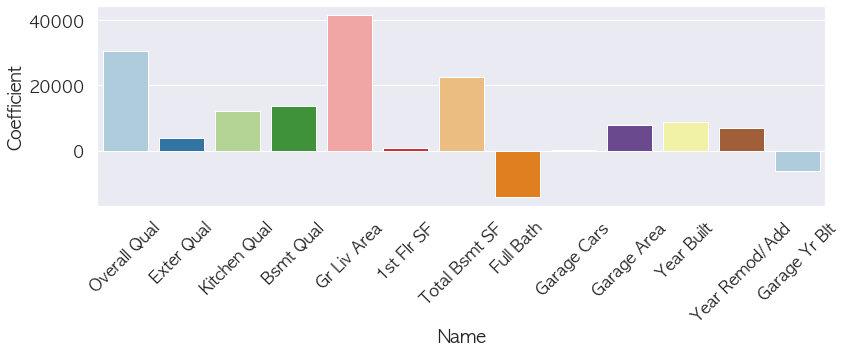

In [133]:
Results = pd.DataFrame({"Name":x_tr_fs.columns,
                        "Coefficient":model.coef_})
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
g1 = sns.barplot(data=Results, x='Name', y='Coefficient', ax=ax, palette="Paired")
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
plt.tight_layout()
plt.show()

In [134]:
y_pred_fs = model.predict(x_val_fs)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('\nMSE : ', mean_squared_error(y_val_fs.target, y_pred_fs),
      '\nMAE : ', mean_absolute_error(y_val_fs.target, y_pred_fs),
      '\nNMAE : ', NMAE(y_val_fs, y_pred_fs.reshape(-1,1))[0])


MSE :  679442628.7330118 
MAE :  19472.27535618376 
NMAE :  0.10600090817115707


In [135]:
fs_tmp = {'Method' : 'Embedded', 
          'Type' : 'Lasso', 
          'MSE' : mean_squared_error(y_val_fs, y_pred_fs),
          'NMAE' : NMAE(y_val_fs, y_pred_fs.reshape(-1,1))[0]}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Feature Selection Results

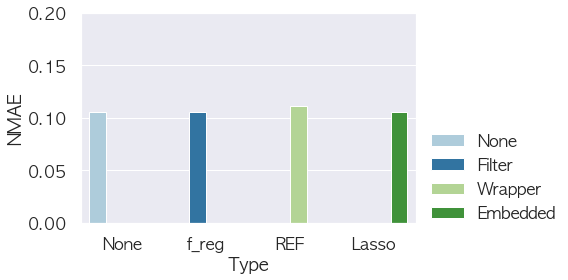

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
g1 = sns.barplot(data=fs_df, y='NMAE', x='Type', hue='Method', ax=ax, palette="Paired")
g1.legend(bbox_to_anchor=(1.0, 0.5))
g1.set(ylim=(0, 0.2))
plt.tight_layout()
plt.show()

### ML Modeling

* 전처리된 데이터를 대상으로 ML 기법을 활용하여 모델을 구성해보자

In [137]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(df_feature, df_label, test_size=0.20, random_state=42)

#### Scaling & Encoding

In [138]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_tr[nF] = scaler.fit_transform(x_tr[nF])
x_val[nF] = scaler.transform(x_val[nF])

#### Model Selection

In [139]:
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge, Lasso, BayesianRidge
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV


In [140]:
Linear = LinearRegression()
Ridge = Ridge()
Lasso = Lasso()
bRdige = BayesianRidge()
SVR = LinearSVR()
Tree = DecisionTreeRegressor()

Model_list = [Linear, Ridge, Lasso, bRdige, SVR, Tree]

In [141]:
def simple_fit(model, X_train, y_train):
    
    cv = KFold(n_splits = 5, random_state = 0, shuffle=True)
    cv_results = cross_validate(model, X_train, y_train, cv=cv) 
    cv_mse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
    cv_mae = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
    y_pred = cross_val_predict(model, X_train, y_train, cv=cv)
    train_mse = mean_squared_error(y_train, y_pred)
    train_mae = mean_absolute_error(y_train, y_pred)
    train_nmae = NMAE(y_train, y_pred.reshape(-1,1))

    return cv_mse, cv_mae, train_mse, train_mae, train_nmae

In [142]:
ms_df = pd.DataFrame(columns=[
                     'Model', 't_MSE', 't_MAE', 't_NMAE'])

i = 0
for model in Model_list:
    i += 1

    cv_mse, cv_mae, train_mse, train_mae, train_nmae  = simple_fit(model, x_tr_fs, y_tr_fs)

    ms_tmp = {'Model': str(model),
              't_MSE': train_mse,
              't_MAE': train_mae,
              't_NMAE': train_nmae[0]}
    ms_df = ms_df.append(ms_tmp, ignore_index=True)
    

In [226]:
ms_df

,Model,t_MSE,t_MAE,t_NMAE
0,LinearRegression(),9.575645e+08,22001.950227,0.117605
1,Ridge(),9.573238e+08,21984.642581,0.117513
2,Lasso(),9.575428e+08,22001.290539,0.117602
3,BayesianRidge(),9.570836e+08,21950.585731,0.117331
4,LinearSVR(),4.068077e+10,185389.695963,0.990948
5,DecisionTreeRegressor(),1.599157e+09,26275.519136,0.140448


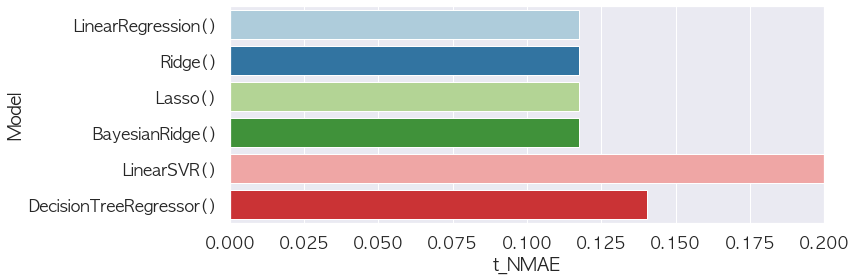

In [146]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
g1 = sns.barplot(data=ms_df, x='t_NMAE', y='Model',
                 ax=ax, palette="Paired")
g1.set(xlim=(0.0, 0.20))
plt.tight_layout()
plt.show()

* Ridge 또는 Bayesian Ridge를 선택하여 모델을 구성하자.

#### Hyper Parameter Tunning

In [147]:
# Hyper Parameter 
param_grid = {'alpha_init':[0.01, 0.1, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9, 10, 100],
              'lambda_init': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]}

# grid search
grid_search = GridSearchCV(BayesianRidge(), param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)        

# finding best parameter
grid_search.fit(x_tr_fs, y_tr_fs)

GridSearchCV(cv=10, estimator=BayesianRidge(),
             param_grid={'alpha_init': [0.01, 0.1, 1, 1.1, 1.2, 1.3, 1.4, 1.5,
                                        1.9, 10, 100],
                         'lambda_init': [10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05,
                                         1e-06, 1e-09]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [148]:
print('Best Parameter :' , grid_search.best_params_)
print('Best Score :' , grid_search.best_score_)

Best Parameter : {'alpha_init': 0.01, 'lambda_init': 10}
Best Score : -941648463.9809862


In [152]:
bestParam = list(grid_search.best_params_.items())
bestParam = pd.DataFrame(bestParam)
bestParam.set_index(0, inplace=True)
bestParam

,1
0,
alpha_init,0.01
lambda_init,10.00


In [157]:
bestParam.reset_index()[0][1][]

'lambda_init'

#### Model Training & Validation

In [158]:
fnl_model = BayesianRidge(alpha_init = 0.01, lambda_init = 10)

In [159]:
fnl_model.fit(x_tr_fs, y_tr_fs)

cv = KFold(n_splits = 5, random_state = 0, shuffle=True)
cv_results = cross_validate(fnl_model, x_tr_fs, y_tr_fs,scoring='neg_mean_squared_error', cv=cv)

cv_mse = cross_val_score(fnl_model, x_tr_fs, y_tr_fs, scoring='neg_mean_squared_error', cv=cv)
cv_mae = cross_val_score(fnl_model, x_tr_fs, y_tr_fs, scoring='neg_mean_squared_error', cv=cv)
y_pred = cross_val_predict(model, x_tr_fs, y_tr_fs, cv=cv)

train_mse = mean_squared_error(y_tr_fs, y_pred)
train_mae = mean_absolute_error(y_tr_fs, y_pred)
train_nmae = NMAE(y_tr_fs, y_pred.reshape(-1,1))

print('train NAME : ', train_nmae[0])

train NAME :  0.14176833654990903


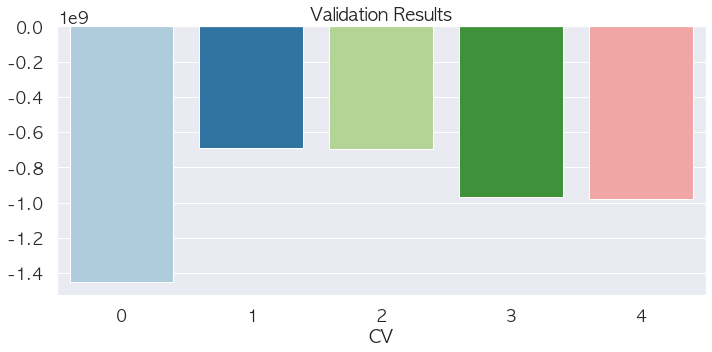

In [160]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
g1 = sns.barplot(x=list(range(len(cv_results['test_score']))), y=cv_results['test_score'], ax = ax, palette="Paired")
g1.set_xlabel('CV')
g1.set_title('Validation Results')
# g1.set(ylim=(0.70, 1.00))
plt.tight_layout()
plt.show()

In [161]:
from sklearn.model_selection import permutation_test_score
score_act, perm_scores_act, pvalue_act = permutation_test_score(
    fnl_model, x_tr_fs, y_tr_fs, scoring="neg_root_mean_squared_error", cv=cv, n_permutations=100)

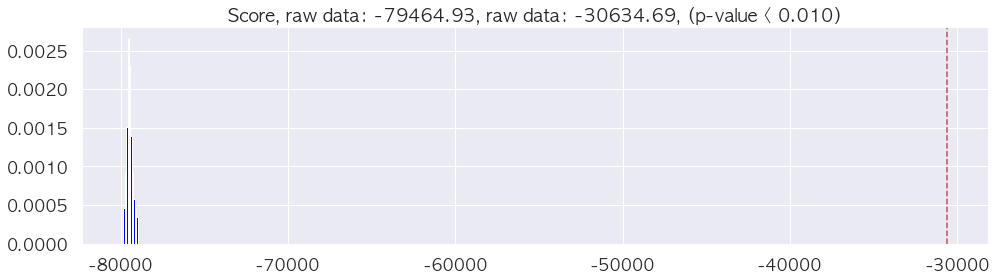

In [162]:
plt.subplots(figsize=(14, 4))
plt.hist(perm_scores_act, density=True, color='blue')
plt.axvline(score_act, ls="--", color="r")
score_label = f"Score, raw data: {np.mean(perm_scores_act):.2f}, raw data: {score_act:.2f}, (p-value < {pvalue_act:.3f})"
plt.title(score_label)
plt.tight_layout()
plt.show()

#### Prediction

In [163]:
y_val_pred = fnl_model.predict(x_val_fs)

test_mse = mean_squared_error(y_val_fs, y_val_pred)
test_mae = mean_absolute_error(y_val_fs, y_val_pred)
test_nmae = NMAE(y_val_fs, y_val_pred.reshape(-1,1))

print('train NAME : ', train_nmae[0])
print('test NAME : ', test_nmae[0])

train NAME :  0.14176833654990903
test NAME :  0.1057964980886108


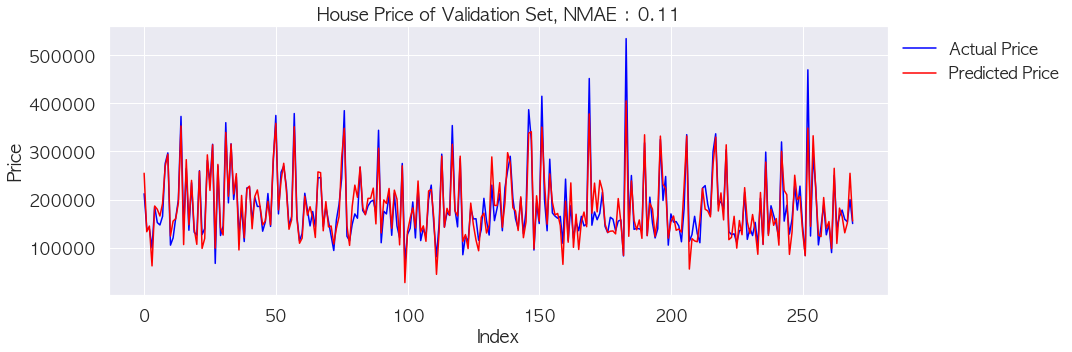

In [164]:
predicted = pd.concat([y_val_fs.reset_index(drop=True), 
                       pd.DataFrame(y_val_pred, columns=['pred'])], 
                      axis=1, ignore_index=True)
predicted.columns = ['Actual Price', 'Predicted Price']

plt.figure(figsize=[15,5])
g1 = sns.lineplot(data = predicted, x=range(len(predicted)), y='Actual Price', color='blue')
g1 = sns.lineplot(data = predicted, x=range(len(predicted)), y='Predicted Price', color='red')
g1.set_ylabel('Price')
g1.set_xlabel('Index')
g1.set_title('House Price of Validation Set, NMAE : %.2f' % (test_nmae[0]))
g1.legend(['Actual Price', 'Predicted Price'], 
          bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

In [165]:
import pingouin as pg
pg.corr(predicted['Actual Price'], predicted['Predicted Price'],
        alternative="two-sided",
        method="pearson")

,n,r,CI95%,p-val,BF10,power
pearson,270,0.934595,"[0.92, 0.95]",2.579772e-122,1.975e+118,1.0


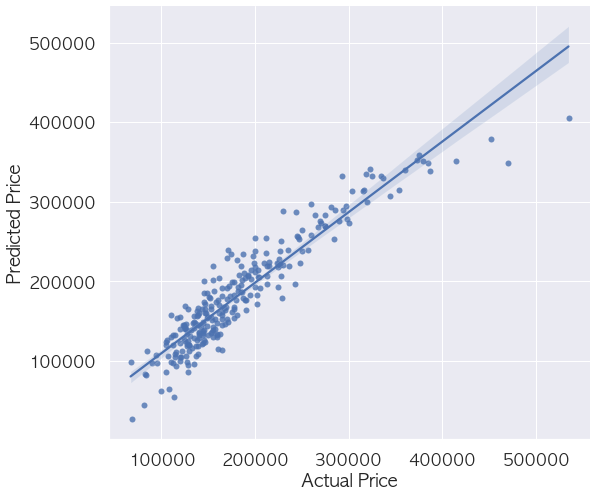

In [166]:
g = sns.lmplot(x='Actual Price', y='Predicted Price', data=predicted, height=7, aspect=1.2);
g.set_axis_labels("Actual Price", "Predicted Price")
plt.tight_layout()
plt.show()

## DL - modeling

* 전처리된 데이터를 대상으로 DL 기법을 활용하여 모델을 구성해보자

In [167]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(df_feature, df_label, test_size=0.20, random_state=42)

### Scaling & Encoding

In [169]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_tr[nF] = scaler.fit_transform(x_tr[nF])
x_val[nF] = scaler.transform(x_val[nF])

In [170]:
x_tr_dl = x_tr.copy()
y_tr_dl = y_tr.copy()
x_val_dl = x_val.copy()
y_val_dl = y_val.copy()

x_tr_dl = np.array(x_tr_dl, dtype=np.float32)
y_tr_dl = np.array(y_tr_dl, dtype=np.float32)
x_val_dl = np.array(x_val_dl, dtype=np.float32)
y_val_dl = np.array(y_val_dl, dtype=np.float32)


### Model Specification

In [171]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [173]:
dl_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_tr_dl.shape[1:]),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu',
                          kernel_initializer='he_normal', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(100, activation = 'relu',
                          kernel_initializer='he_normal', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation = 'relu',
                          kernel_initializer='he_normal', 
                          kernel_regularizer=tf.keras.regularizers.l2(l2=0.001)), 
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear'),
])

In [174]:
dl_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
                loss='mape', metrics='mape')
# dl_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
#                 loss=custom_NMAE, metrics=custom_NMAE)



dl_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               2800      
                                                                 
 dense_7 (Dense)             (None, 150)               30150     
                                                                 
 dense_8 (Dense)             (None, 100)               15100     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                      

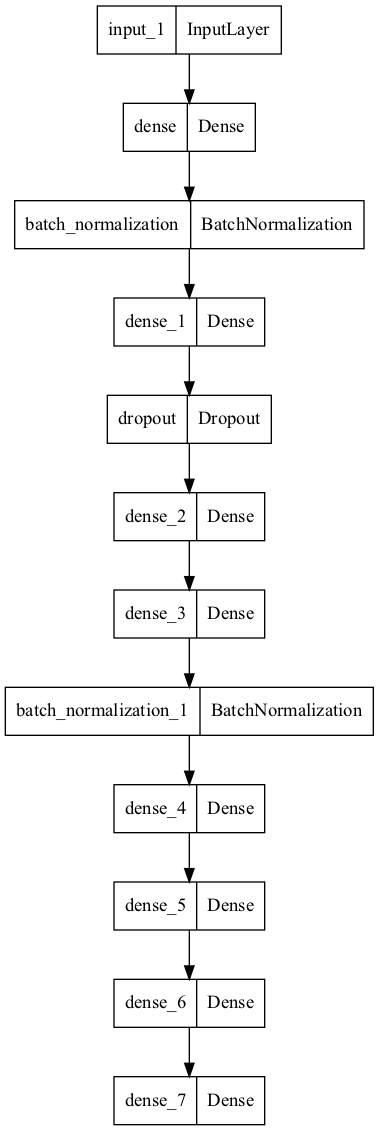

In [96]:
plot_model(dl_model)

In [175]:
# define callback
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("ckp_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard('logs')

### Model Fitting

In [176]:
history = dl_model.fit(x_tr_dl, y_tr_dl.flatten(), epochs=500, 
                    validation_split=0.2, batch_size=16,
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

2022-01-25 20:23:32.015404: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-25 20:23:32.210516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/500
54/54 [==============================] - 1s 11ms/step - loss: 100.4836 - mape: 99.9976 - val_loss: 100.3124 - val_mape: 99.9986
Epoch 2/500
 1/54 [..............................] - ETA: 0s - loss: 100.3072 - mape: 99.9933

2022-01-25 20:23:32.992711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 0s 8ms/step - loss: 100.1975 - mape: 99.9773 - val_loss: 100.1288 - val_mape: 99.9777
Epoch 3/500
54/54 [==============================] - 0s 8ms/step - loss: 99.9170 - mape: 99.7801 - val_loss: 100.0054 - val_mape: 99.8516
Epoch 4/500
54/54 [==============================] - 0s 8ms/step - loss: 99.1403 - mape: 98.9105 - val_loss: 99.0838 - val_mape: 98.7388
Epoch 5/500
54/54 [==============================] - 0s 8ms/step - loss: 97.1754 - mape: 96.6537 - val_loss: 94.9357 - val_mape: 94.2005
Epoch 6/500
54/54 [==============================] - 0s 8ms/step - loss: 93.3493 - mape: 92.3315 - val_loss: 88.4167 - val_mape: 87.0653
Epoch 7/500
54/54 [==============================] - 0s 8ms/step - loss: 86.8169 - mape: 85.0532 - val_loss: 85.7835 - val_mape: 83.5794
Epoch 8/500
54/54 [==============================] - 0s 8ms/step - loss: 76.3323 - mape: 73.6307 - val_loss: 66.5807 - val_mape: 63.3111
Epoch 9/500
54/54 [==============================]

54/54 [==============================] - 0s 7ms/step - loss: 17.4586 - mape: 12.7011 - val_loss: 18.5657 - val_mape: 13.8143
Epoch 62/500
54/54 [==============================] - 0s 8ms/step - loss: 17.2448 - mape: 12.4445 - val_loss: 17.0235 - val_mape: 12.1845
Epoch 63/500
54/54 [==============================] - 0s 7ms/step - loss: 17.2611 - mape: 12.4227 - val_loss: 17.5959 - val_mape: 12.8229
Epoch 64/500
54/54 [==============================] - 0s 7ms/step - loss: 17.0649 - mape: 12.2914 - val_loss: 19.9870 - val_mape: 15.2333
Epoch 65/500
54/54 [==============================] - 0s 7ms/step - loss: 16.7306 - mape: 12.0201 - val_loss: 17.2879 - val_mape: 12.6118
Epoch 66/500
54/54 [==============================] - 0s 8ms/step - loss: 16.2019 - mape: 11.5528 - val_loss: 16.3200 - val_mape: 11.6942
Epoch 67/500
54/54 [==============================] - 0s 8ms/step - loss: 16.3919 - mape: 11.7935 - val_loss: 16.1898 - val_mape: 11.6455
Epoch 68/500
54/54 [===========================

54/54 [==============================] - 0s 7ms/step - loss: 12.7578 - mape: 10.2002 - val_loss: 15.0068 - val_mape: 12.4704
Epoch 121/500
54/54 [==============================] - 0s 8ms/step - loss: 12.1322 - mape: 9.6080 - val_loss: 13.8991 - val_mape: 11.3517
Epoch 122/500
54/54 [==============================] - 0s 7ms/step - loss: 12.5412 - mape: 9.9994 - val_loss: 16.9215 - val_mape: 14.3980
Epoch 123/500
54/54 [==============================] - 0s 8ms/step - loss: 12.4733 - mape: 9.9786 - val_loss: 13.7839 - val_mape: 11.2898
Epoch 124/500
54/54 [==============================] - 0s 7ms/step - loss: 12.5372 - mape: 10.0428 - val_loss: 14.4457 - val_mape: 11.9528
Epoch 125/500
54/54 [==============================] - 0s 7ms/step - loss: 12.6166 - mape: 10.1512 - val_loss: 15.4330 - val_mape: 12.9818
Epoch 126/500
54/54 [==============================] - 0s 7ms/step - loss: 11.7873 - mape: 9.3418 - val_loss: 13.7843 - val_mape: 11.3396
Epoch 127/500
54/54 [========================

54/54 [==============================] - 0s 7ms/step - loss: 9.2440 - mape: 7.4136 - val_loss: 13.6748 - val_mape: 11.8378
Epoch 180/500
54/54 [==============================] - 0s 7ms/step - loss: 9.8023 - mape: 7.9797 - val_loss: 14.3852 - val_mape: 12.5610
Epoch 181/500
54/54 [==============================] - 0s 7ms/step - loss: 9.9021 - mape: 8.0839 - val_loss: 13.6391 - val_mape: 11.8338
Epoch 182/500
54/54 [==============================] - 0s 7ms/step - loss: 9.5985 - mape: 7.7925 - val_loss: 14.8189 - val_mape: 13.0130
Epoch 183/500
54/54 [==============================] - 0s 7ms/step - loss: 9.1204 - mape: 7.3278 - val_loss: 14.1448 - val_mape: 12.3564
Epoch 184/500
54/54 [==============================] - 0s 7ms/step - loss: 9.9807 - mape: 8.1977 - val_loss: 13.1342 - val_mape: 11.3642
Epoch 185/500
54/54 [==============================] - 0s 7ms/step - loss: 9.3619 - mape: 7.5920 - val_loss: 13.1114 - val_mape: 11.3415
Epoch 186/500
54/54 [==============================] - 

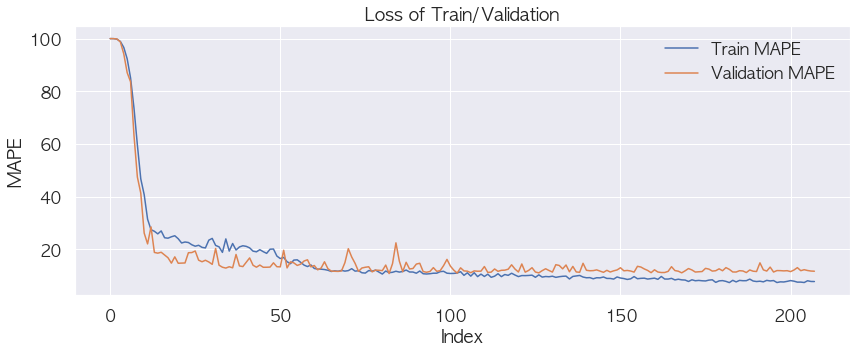

In [177]:
def plot_loss(history):
    df = pd.DataFrame(history.history).filter(['mape','val_mape'])
    plt.subplots(figsize=[12,5])
    g1=sns.lineplot(x=df.index.values, y=df.mape)
    g1=sns.lineplot(x=df.index.values, y=df.val_mape)    
    g1.set_ylabel('MAPE')
    g1.set_xlabel('Index')
    g1.set_title('Loss of Train/Validation')
    g1.legend(['Train MAPE', 'Validation MAPE'], 
          bbox_to_anchor=(1.0, 1.0))
    plt.tight_layout()
    plt.show()
    
plot_loss(history)


### Prediction

In [179]:
t_loss, t_mse = dl_model.evaluate(x_val_dl,  y_val_dl, )
y_val_pred_dl = dl_model.predict(x_val_dl)

9/9 [==============================] - 0s 5ms/step - loss: 12.6003 - mape: 10.8507


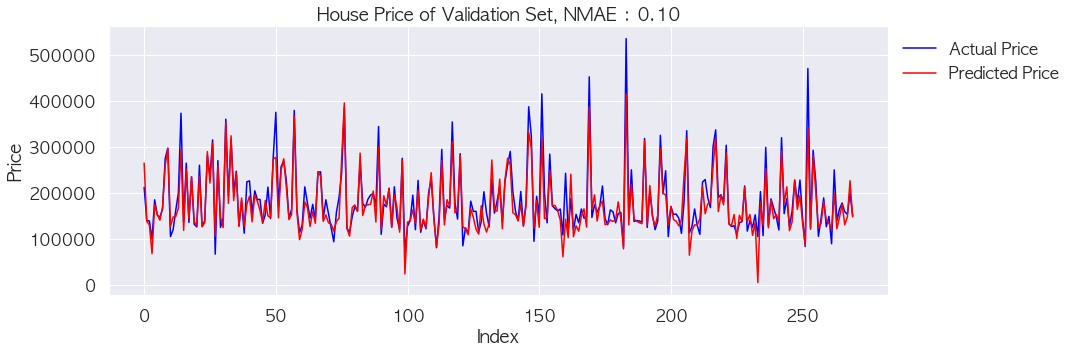

In [180]:
predicted = pd.concat([pd.DataFrame(y_val_dl, columns = ['Actual Price']), 
                       pd.DataFrame(y_val_pred_dl, columns = ['Predicted Price'])], 
                      axis=1, ignore_index=False)
#predicted.columns = ['Actual Price', 'Predicted Price']

plt.figure(figsize=[15,5])
g1 = sns.lineplot(data = predicted, x=range(len(predicted)), y='Actual Price', color='blue')
g1 = sns.lineplot(data = predicted, x=range(len(predicted)), y='Predicted Price', color='red')
g1.set_ylabel('Price')
g1.set_xlabel('Index')
g1.set_title('House Price of Validation Set, NMAE : %.2f' % (NMAE(y_val_dl, y_val_pred_dl)))
g1.legend(['Actual Price', 'Predicted Price'], 
          bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

In [181]:
import pingouin as pg
pg.corr(predicted['Actual Price'], predicted['Predicted Price'],
        alternative="two-sided",
        method="pearson")

,n,r,CI95%,p-val,BF10,power
pearson,270,0.934805,"[0.92, 0.95]",1.699542e-122,2.988e+118,1.0


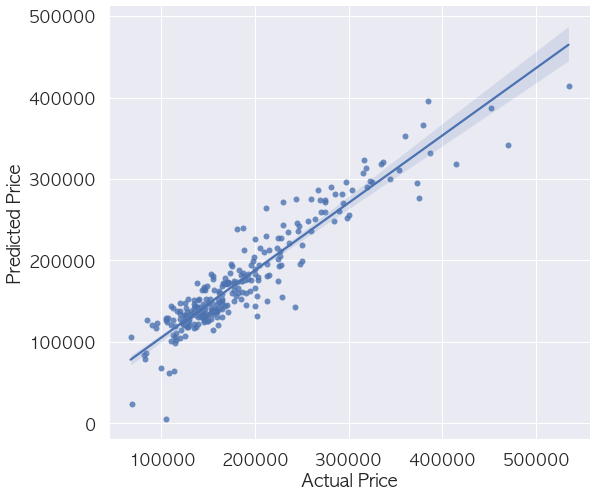

In [182]:
g = sns.lmplot(x='Actual Price', y='Predicted Price', data=predicted, height=7, aspect=1.2);
g.set_axis_labels("Actual Price", "Predicted Price")
plt.tight_layout()
plt.show()

## Model Evaluation

* ML model과 DL model을 비교한 결과는 다음과 같다.

In [183]:
model_results=pd.DataFrame()
ml = pd.DataFrame({"Method" : ['ML'], 
      "Model" : ['BayesRidge'], 
      "NMAE" : NMAE(np.array(y_val_fs).flatten(), y_val_pred)})
dl = pd.DataFrame({'Method' : ['DL'], 
      'Model' : ['Dense'], 
      'NMAE' : NMAE(y_val_dl, y_val_pred_dl)})
res = pd.concat([ml,dl]).reset_index(drop=True)
res

,Method,Model,NMAE
0,ML,BayesRidge,0.105796
1,DL,Dense,0.104459


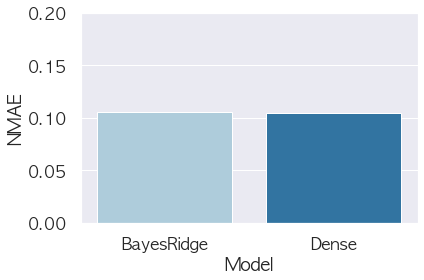

In [184]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
g1 = sns.barplot(data=res, y='NMAE', x='Model', ax=ax, palette="Paired")
g1.set(ylim=(0, 0.2))
plt.tight_layout()
plt.show()

* Data 수 부족, 정교한 Model Specification 부족으로 DL 모델이 ML 모델보다 낮은 성능을 보인다.
* 최종 테스트는 ML - BayesianRidge로 수행한다.

## Final ML Modeling

### Setting

In [185]:
# utility
import os
from copy import deepcopy
import warnings

# data handling
import pandas as pd
import numpy as np
import missingno as msno

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats
import pingouin as pg

# modeling
import sklearn
from sklearn.metrics import make_scorer

In [186]:
# plotting setting
from IPython.core.display import display, HTML
from IPython.display import Image
plt.style.use('seaborn')  # plt.style.use('ggplot')
sns.set(font_scale=1.5)

plt.rc('font', family='AppleGothic') # For Windows
plt.rcParams['figure.figsize'] = [10, 5]
mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

# ignore warnings
warnings.filterwarnings('ignore')

proj_dir=os.getcwd()
data_dir=(proj_dir +  '/data')

In [187]:
def outlier_value(df):
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = pd.DataFrame(Q1-(IQR*1.5), columns=['q_lower'])
    Q_upper = pd.DataFrame(Q3+(IQR*1.5), columns=['q_upper'])

    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = pd.DataFrame(Mean-std*3, columns=['n_lower'])
    N_upper = pd.DataFrame(Mean+std*3, columns=['n_upper'])
    
    results = pd.concat([Q_lower,Q_upper,N_lower,N_upper], axis = 1)
    return results

def outlier_counts(df):
    tmp_df = deepcopy(df)
    
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = Q1-(IQR*1.5)
    Q_upper = Q3+(IQR*1.5)
    
    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = Mean-std*3
    N_upper = Mean+std*3
    
    Q_out = ((tmp_df<Q_lower) | (tmp_df>Q_upper)).sum()
    N_out = ((tmp_df<N_lower) | (tmp_df>N_upper)).sum()
    
    results = pd.concat([Q_out, N_out],axis=1)
    results.columns = ['IQR*1.5', '+-3SD']
    return results

def outlier_mask(df):
    tmp_df = deepcopy(df)
    
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = Q1-(IQR*1.5)
    Q_upper = Q3+(IQR*1.5)
    
    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = Mean-std*3
    N_upper = Mean+std*3
    
    Q_out = ((tmp_df<Q_lower) | (tmp_df>Q_upper))
    N_out = ((tmp_df<N_lower) | (tmp_df>N_upper))
    
    return Q_out, N_out

def replace_outlier(df, columns, threshold):
    for i, j in enumerate(columns):
        tmp_df = df.copy()
        tmp_df[j][tmp_df[j] > threshold] = np.median(tmp_df[j])
        
    return tmp_df   

In [188]:
def custom_NMAE(y_true, y_pred, convertNP=False):
    
    if convertNP == True:
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
    
    mae = np.mean(np.abs(y_true-y_pred))
    loss = mae / np.mean(np.abs(y_true))    

    return -loss

def NMAE(y_true, y_pred, convertNP=False):
    
    if convertNP == True:
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
    
    mae = np.mean(np.abs(y_true-y_pred))
    loss = mae / np.mean(np.abs(y_true))    

    return loss

### Data Preparation

In [189]:
os.listdir(data_dir)
df_train_raw = pd.read_csv(('%s/train.csv' % (data_dir)), encoding='euc-kr')
df_test_raw = pd.read_csv(('%s/test.csv' % (data_dir)), encoding='euc-kr')

In [190]:
nF

['Overall Qual',
 'Exter Qual',
 'Kitchen Qual',
 'Bsmt Qual',
 'Gr Liv Area',
 '1st Flr SF',
 'Total Bsmt SF',
 'Full Bath',
 'Garage Cars',
 'Garage Area',
 'Year Built',
 'Year Remod/Add',
 'Garage Yr Blt']

In [191]:
ID = ['id']
nF = ['Overall Qual','Exter Qual','Kitchen Qual','Bsmt Qual','Gr Liv Area','1st Flr SF','Total Bsmt SF',
 'Full Bath','Garage Cars','Garage Area','Year Built','Year Remod/Add','Garage Yr Blt']
tF = ['target']

In [199]:
df_train = df_train_raw[nF].copy()
df_label = df_train_raw[tF].copy()
df_test = df_test_raw[nF].copy()

### Preprocessing & Feature Engineering

#### Outliers

In [200]:
nF_year =['Year Built', 'Year Remod/Add', 'Garage Yr Blt'] 
df_train = replace_outlier(df_train, nF_year, 2020)
df_test = replace_outlier(df_test, nF_year, 2020)

#### Scaling & Encoding

In [201]:
df_train.replace(['Ex'], 4, inplace=True)
df_train.replace(['Gd'], 3, inplace=True)
df_train.replace(['TA'], 2, inplace=True)
df_train.replace(['Fa'], 1, inplace=True)
df_train.replace(['Po'], 0, inplace=True)

df_test.replace(['Ex'], 4, inplace=True)
df_test.replace(['Gd'], 3, inplace=True)
df_test.replace(['TA'], 2, inplace=True)
df_test.replace(['Fa'], 1, inplace=True)
df_test.replace(['Po'], 0, inplace=True)

In [202]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train_nF = scaler.fit_transform(df_train[nF])
x_train_nF = pd.DataFrame(x_train_nF)
x_train_nF.columns = nF
x_test_nF = scaler.transform(df_test[nF])
x_test_nF = pd.DataFrame(x_test_nF)
x_test_nF.columns = nF

x_train = x_train_nF
x_test = x_test_nF

In [204]:
print(x_train.columns)
print('\n\n')
print(x_test.columns)

Index(['Overall Qual', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual',
       'Gr Liv Area', '1st Flr SF', 'Total Bsmt SF', 'Full Bath',
       'Garage Cars', 'Garage Area', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt'],
      dtype='object')



Index(['Overall Qual', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual',
       'Gr Liv Area', '1st Flr SF', 'Total Bsmt SF', 'Full Bath',
       'Garage Cars', 'Garage Area', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt'],
      dtype='object')


#### Feature Selection

In [205]:
y_train = df_label.copy()

In [208]:
from sklearn.feature_selection import RFE
selector = RFE(LinearRegression(), n_features_to_select=0.8, step=1)
selector.fit(x_train , y_train)
is_support = selector.get_support()

In [209]:
pd.DataFrame({"Name":x_train.columns,
          "Results": is_support})

,Name,Results
0,Overall Qual,True
1,Exter Qual,True
2,Kitchen Qual,True
3,Bsmt Qual,True
4,Gr Liv Area,True
5,1st Flr SF,False
6,Total Bsmt SF,True
7,Full Bath,True
8,Garage Cars,False
9,Garage Area,True


In [210]:
x_train_fs = x_train[x_train.columns[is_support].values].copy()
x_test_fs = x_test[x_test.columns[is_support].values].copy()

In [211]:
x_train_fs.shape, y_train.shape, x_test_fs.shape

((1350, 10), (1350, 1), (1350, 10))

#### Modeling

In [212]:
x_train_fs = np.array(x_train_fs)
y_train = np.array(y_train).flatten()
x_test_fs = np.array(x_test_fs)

##### Hyper Parameter Tunnning

In [213]:
# Hyper Parameter 
param_grid = {'alpha_init':[0.01, 0.1, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9, 10, 100],
              'lambda_init': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]}

# grid search
grid_search = GridSearchCV(BayesianRidge(), param_grid, cv=10,
                           scoring=make_scorer(custom_NMAE, greater_is_better=False),
#                           scoring='neg_mean_squared_error',
                           return_train_score=True)        

# finding best parameter
grid_search.fit(x_train_fs, y_train)

bestParam = list(grid_search.best_params_.items())
bestParam = pd.DataFrame(bestParam)
bestParam.set_index(0)

,1
0,
alpha_init,0.01
lambda_init,10.00


In [214]:
alpha_init = bestParam.loc[0][1]
lambda_init = bestParam.loc[1][1]

##### Model Specification

In [215]:
fnl_model = BayesianRidge(alpha_init = alpha_init, lambda_init = lambda_init)

##### Train & Validation

In [216]:
fnl_model.fit(np.array(x_train_fs), np.array(y_train))

cv = KFold(n_splits = 10, random_state = 0, shuffle=True)
cv_results = cross_validate(fnl_model, x_train_fs, y_train,
                            scoring=make_scorer(custom_NMAE, greater_is_better=False), 
                            cv=cv)

cv_nmae = cross_val_score(fnl_model, x_train_fs, y_train,
                         scoring=make_scorer(custom_NMAE, greater_is_better=False), 
                         cv=cv)

y_pred = cross_val_predict(model, x_train_fs, y_train, cv=cv)

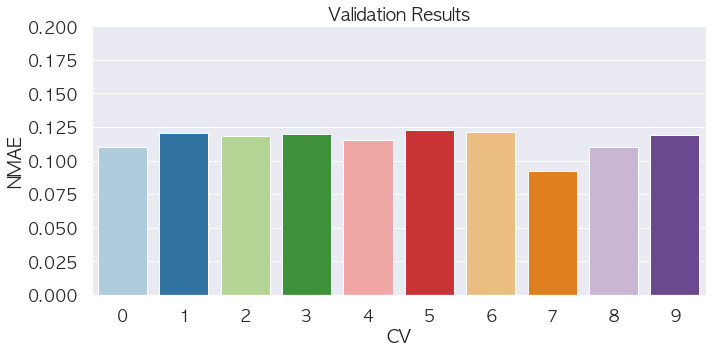

In [217]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
g1 = sns.barplot(x=list(range(len(cv_results['test_score']))), y=cv_results['test_score'], ax = ax, palette="Paired")
g1.set_ylabel('NMAE')
g1.set_xlabel('CV')
g1.set_title('Validation Results')
g1.set(ylim=(0.0, .20))
plt.tight_layout()
plt.show()

In [218]:
print('cv NAME : ', np.mean(cv_nmae))
print('fnl NAME : ', NMAE(y_train, y_pred) )

cv NAME :  0.11499568867594782
fnl NAME :  0.1423529295885685


In [219]:
from sklearn.model_selection import permutation_test_score
score_act, perm_scores_act, pvalue_act = permutation_test_score(
    fnl_model, x_train_fs, y_train, 
    scoring=make_scorer(custom_NMAE, greater_is_better=False), 
    cv=cv, n_permutations=100)

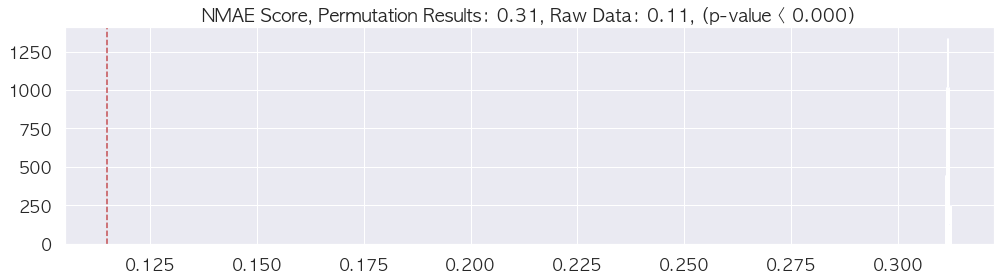

In [220]:
perm_res = pg.ttest(x=perm_scores_act , y =score_act)
plt.subplots(figsize=(14, 4))
plt.hist(perm_scores_act, density=True, color='blue')
plt.axvline(score_act, ls="--", color="r")
score_label = f"NMAE Score, Permutation Results: {np.mean(perm_scores_act):.2f}, Raw Data: {score_act:.2f}, (p-value < {perm_res['p-val'][0]:.3f})"
plt.title(score_label)
plt.tight_layout()
plt.show()

#### Prediction

In [221]:
y_test = fnl_model.predict(x_test_fs)

 #### Submission

In [222]:
df_sample = pd.read_csv(('%s/sample_submission.csv' % (data_dir)), encoding='euc-kr')

In [223]:
df_sample['target'] = y_test

In [224]:
df_sample

,id,target
0,1,325811.210850
1,2,134222.117772
2,3,182873.724930
3,4,266391.262413
4,5,129002.793710
...,...,...
1345,1346,334192.973762
1346,1347,104170.374354
1347,1348,63553.463880
1348,1349,204425.522729


In [225]:
df_sample.to_csv("submission_2.csv", mode='a', header=True,
                index=False, columns=['id','target'])

## Final DL Modeling

In [231]:
# utility
import os
from copy import deepcopy
import warnings

# data handling
import pandas as pd
import numpy as np
import missingno as msno

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats
import pingouin as pg

# modeling
import sklearn
from sklearn.metrics import make_scorer
import keras
# import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [232]:
# plotting setting
from IPython.core.display import display, HTML
from IPython.display import Image
plt.style.use('seaborn')  # plt.style.use('ggplot')
sns.set(font_scale=1.5)

plt.rc('font', family='AppleGothic') # For Windows
plt.rcParams['figure.figsize'] = [10, 5]
mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

# ignore warnings
warnings.filterwarnings('ignore')

In [233]:
def outlier_value(df):
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = pd.DataFrame(Q1-(IQR*1.5), columns=['q_lower'])
    Q_upper = pd.DataFrame(Q3+(IQR*1.5), columns=['q_upper'])

    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = pd.DataFrame(Mean-std*3, columns=['n_lower'])
    N_upper = pd.DataFrame(Mean+std*3, columns=['n_upper'])
    
    results = pd.concat([Q_lower,Q_upper,N_lower,N_upper], axis = 1)
    return results

def outlier_counts(df):
    tmp_df = deepcopy(df)
    
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = Q1-(IQR*1.5)
    Q_upper = Q3+(IQR*1.5)
    
    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = Mean-std*3
    N_upper = Mean+std*3
    
    Q_out = ((tmp_df<Q_lower) | (tmp_df>Q_upper)).sum()
    N_out = ((tmp_df<N_lower) | (tmp_df>N_upper)).sum()
    
    results = pd.concat([Q_out, N_out],axis=1)
    results.columns = ['IQR*1.5', '+-3SD']
    return results

def outlier_mask(df):
    tmp_df = deepcopy(df)
    
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = Q1-(IQR*1.5)
    Q_upper = Q3+(IQR*1.5)
    
    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = Mean-std*3
    N_upper = Mean+std*3
    
    Q_out = ((tmp_df<Q_lower) | (tmp_df>Q_upper))
    N_out = ((tmp_df<N_lower) | (tmp_df>N_upper))
    
    return Q_out, N_out

def replace_outlier(df, columns, threshold):
    for i, j in enumerate(columns):
        tmp_df = df.copy()
        tmp_df[j][tmp_df[j] > threshold] = np.median(tmp_df[j])
        
    return tmp_df   

def custom_NMAE(y_true, y_pred, convertNP=False):
    
    if convertNP == True:
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
    
    mae = np.mean(np.abs(y_true-y_pred))
    loss = mae / np.mean(np.abs(y_true))    

    return -loss

def NMAE(y_true, y_pred, convertNP=False):
    
    if convertNP == True:
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
    
    mae = np.mean(np.abs(y_true-y_pred))
    loss = mae / np.mean(np.abs(y_true))    

    return loss

In [234]:
proj_dir=os.getcwd()
data_dir=(proj_dir +  '/data')

os.listdir(data_dir)
df_train_raw = pd.read_csv(('%s/train.csv' % (data_dir)), encoding='euc-kr')
df_test_raw = pd.read_csv(('%s/test.csv' % (data_dir)), encoding='euc-kr')

In [235]:
ID = ['id']
nF = ['Overall Qual','Exter Qual','Kitchen Qual','Bsmt Qual','Gr Liv Area','1st Flr SF','Total Bsmt SF',
 'Full Bath','Garage Cars','Garage Area','Year Built','Year Remod/Add','Garage Yr Blt']
tF = ['target']
df_train = df_train_raw[nF].copy()
df_label = df_train_raw[tF].copy()
df_test = df_test_raw[nF].copy()

In [236]:
nF_year =['Year Built', 'Year Remod/Add', 'Garage Yr Blt'] 
df_train = replace_outlier(df_train, nF_year, 2020)
df_test = replace_outlier(df_test, nF_year, 2020)


In [237]:
df_train.replace(['Ex'], 4, inplace=True)
df_train.replace(['Gd'], 3, inplace=True)
df_train.replace(['TA'], 2, inplace=True)
df_train.replace(['Fa'], 1, inplace=True)
df_train.replace(['Po'], 0, inplace=True)

df_test.replace(['Ex'], 4, inplace=True)
df_test.replace(['Gd'], 3, inplace=True)
df_test.replace(['TA'], 2, inplace=True)
df_test.replace(['Fa'], 1, inplace=True)
df_test.replace(['Po'], 0, inplace=True)

In [238]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train_nF = scaler.fit_transform(df_train[nF])
x_train_nF = pd.DataFrame(x_train_nF)
x_train_nF.columns = nF
x_test_nF = scaler.transform(df_test[nF])
x_test_nF = pd.DataFrame(x_test_nF)
x_test_nF.columns = nF

x_train = x_train_nF
x_test = x_test_nF

In [239]:
x_train_fs = np.array(x_train)
y_train = np.array(y_train).flatten()
x_test_fs = np.array(x_test)

Index(['Overall Qual', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual',
       'Gr Liv Area', '1st Flr SF', 'Total Bsmt SF', 'Full Bath',
       'Garage Cars', 'Garage Area', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt'],
      dtype='object')



Index(['Overall Qual', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual',
       'Gr Liv Area', '1st Flr SF', 'Total Bsmt SF', 'Full Bath',
       'Garage Cars', 'Garage Area', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt'],
      dtype='object')


In [251]:
dl_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train_fs.shape[1:]),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu',
                          kernel_initializer='he_normal', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(100, activation = 'relu',
                          kernel_initializer='he_normal', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation = 'relu',
                          kernel_initializer='he_normal', 
                          kernel_regularizer=tf.keras.regularizers.l2(l2=0.001)), 
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear'),
])

dl_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
                loss='mape', 
                 metrics='mape')
# dl_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
#                 loss=custom_NMAE, metrics=custom_NMAE)

# define callback
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("ckp_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard('logs')

In [252]:
dl_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 200)               2800      
                                                                 
 dense_37 (Dense)            (None, 150)               30150     
                                                                 
 dense_38 (Dense)            (None, 100)               15100     
                                                                 
 batch_normalization_6 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_39 (Dense)            (None, 100)               10100     
                                                                 
 dense_40 (Dense)            (None, 10)                1010      
                                                      

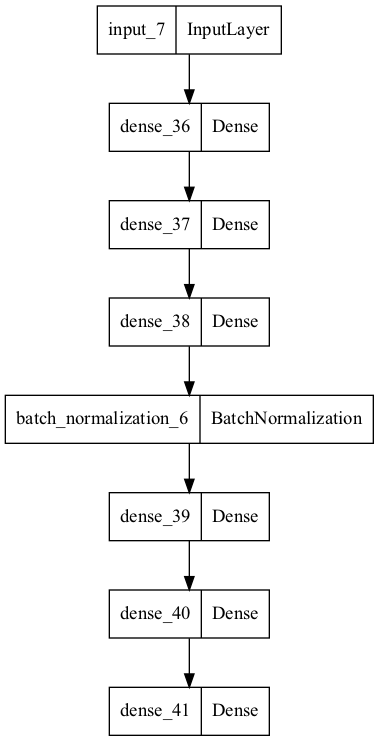

In [253]:
plot_model(dl_model)

In [254]:
history = dl_model.fit(x_train_fs, y_train, epochs=500, 
                    validation_split=0.2, batch_size=16,
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])


Epoch 1/500


2022-01-25 23:06:35.085587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - 1s 15ms/step - loss: 100.4399 - mape: 99.9949 - val_loss: 100.2500 - val_mape: 99.9947
Epoch 2/500
 1/68 [..............................] - ETA: 0s - loss: 100.2395 - mape: 99.9842

2022-01-25 23:06:36.138530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - 1s 9ms/step - loss: 100.0925 - mape: 99.9154 - val_loss: 100.0022 - val_mape: 99.8604
Epoch 3/500
68/68 [==============================] - 1s 10ms/step - loss: 99.4595 - mape: 99.2585 - val_loss: 99.0157 - val_mape: 98.6974
Epoch 4/500
68/68 [==============================] - 1s 10ms/step - loss: 97.0956 - mape: 96.5429 - val_loss: 95.9096 - val_mape: 95.0446
Epoch 5/500
68/68 [==============================] - 1s 9ms/step - loss: 91.0615 - mape: 89.7794 - val_loss: 82.6725 - val_mape: 80.8787
Epoch 6/500
68/68 [==============================] - 1s 9ms/step - loss: 79.1185 - mape: 76.7084 - val_loss: 64.2625 - val_mape: 61.1419
Epoch 7/500
68/68 [==============================] - 1s 9ms/step - loss: 62.6771 - mape: 58.8277 - val_loss: 52.3964 - val_mape: 47.8611
Epoch 8/500
68/68 [==============================] - 1s 9ms/step - loss: 49.2850 - mape: 44.1930 - val_loss: 41.6656 - val_mape: 36.0457
Epoch 9/500
68/68 [==============================

68/68 [==============================] - 1s 8ms/step - loss: 13.8273 - mape: 10.2364 - val_loss: 17.3520 - val_mape: 13.7848
Epoch 62/500
68/68 [==============================] - 1s 8ms/step - loss: 14.1679 - mape: 10.6537 - val_loss: 16.1198 - val_mape: 12.6288
Epoch 63/500
68/68 [==============================] - 1s 8ms/step - loss: 13.5885 - mape: 10.1015 - val_loss: 15.7977 - val_mape: 12.3300
Epoch 64/500
68/68 [==============================] - 1s 8ms/step - loss: 13.2487 - mape: 9.8079 - val_loss: 21.0693 - val_mape: 17.6614
Epoch 65/500
68/68 [==============================] - 1s 8ms/step - loss: 13.8920 - mape: 10.4831 - val_loss: 17.0134 - val_mape: 13.6087
Epoch 66/500
68/68 [==============================] - 1s 8ms/step - loss: 13.3402 - mape: 9.9608 - val_loss: 18.2141 - val_mape: 14.8375
Epoch 67/500
68/68 [==============================] - 1s 8ms/step - loss: 13.7909 - mape: 10.4899 - val_loss: 21.1223 - val_mape: 17.8605
Epoch 68/500
68/68 [=============================

68/68 [==============================] - 1s 9ms/step - loss: 10.8739 - mape: 8.8941 - val_loss: 15.1277 - val_mape: 13.1657
Epoch 121/500
68/68 [==============================] - 1s 8ms/step - loss: 10.0426 - mape: 8.0858 - val_loss: 14.7353 - val_mape: 12.7758
Epoch 122/500
68/68 [==============================] - 1s 9ms/step - loss: 10.3187 - mape: 8.3606 - val_loss: 14.2550 - val_mape: 12.2948
Epoch 123/500
68/68 [==============================] - 1s 9ms/step - loss: 10.1625 - mape: 8.2037 - val_loss: 17.3066 - val_mape: 15.3581
Epoch 124/500
68/68 [==============================] - 1s 9ms/step - loss: 10.8557 - mape: 8.9197 - val_loss: 17.4977 - val_mape: 15.5637
Epoch 125/500
68/68 [==============================] - 1s 8ms/step - loss: 10.6182 - mape: 8.6902 - val_loss: 15.4706 - val_mape: 13.5475
Epoch 126/500
68/68 [==============================] - 1s 8ms/step - loss: 10.6523 - mape: 8.7421 - val_loss: 17.3778 - val_mape: 15.4916
Epoch 127/500
68/68 [===========================

In [255]:
def plot_loss(history):
    df = pd.DataFrame(history.history).filter(['mape','val_mape'])
    plt.subplots(figsize=[12,5])
    g1=sns.lineplot(x=df.index.values, y=df.mape)
    g1=sns.lineplot(x=df.index.values, y=df.val_mape)    
    g1.set_ylabel('MAPE')
    g1.set_xlabel('Index')
    g1.set_title('Loss of Train/Validation')
    g1.legend(['Train MAPE', 'Validation MAPE'], 
          bbox_to_anchor=(1.0, 1.0))
    plt.tight_layout()
    plt.show()

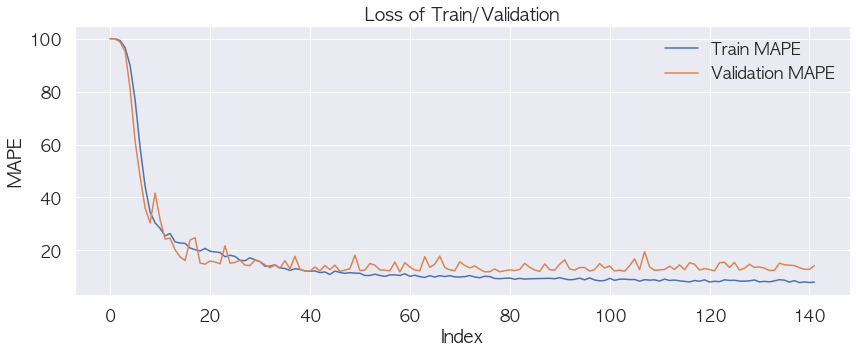

In [256]:
plot_loss(history)

In [258]:
y_pred = dl_model.predict(x_test_fs)

In [259]:
y_pred

array([[360315.12 ],
       [116870.555],
       [182254.47 ],
       ...,
       [ 61146.113],
       [168138.78 ],
       [116829.625]], dtype=float32)

In [260]:
df_sample = pd.read_csv(('%s/sample_submission.csv' % (data_dir)), encoding='euc-kr')
df_sample['target'] = y_pred
df_sample
df_sample.to_csv("submission_3.csv", mode='a', header=True,
                index=False, columns=['id','target'])